# ANALISIS DESCRIPTIVO MEDIOS DE PAGO DIGITAL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns

In [2]:
#Para cuando se ejecuta desde google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Para cuando se carga desde el usuario de Cristian Borrero
df= pd.read_excel("drive/My Drive/Base_bruta_v7.xlsx")

In [ ]:
# Para cuando se carga desde el usuario de Angie Vela
##df= pd.read_excel("drive/My Drive/Proyecto de Profundización II/Base_bruta_v7.xlsx")

In [4]:
# Convertir variables int a object

# Select columns with int64 dtype
int64_cols = df.select_dtypes(include=['int64']).columns

# Convert these columns to object dtype
df[int64_cols] = df[int64_cols].astype(str)


In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df_cuantitativas = df[['EstratoIMP']]

# Analisis Descriptivo

## Analisis Univariado Cuantitativas

In [7]:
resumen = df_cuantitativas.describe()
resumen = resumen.drop('count')

resumen

EstratoIMP
unique          6
top             2
freq         2151

## Análisis Bivariado Cuantitativas

In [9]:
df.groupby('Pago_Digital')['EstratoIMP'].describe()

count unique top  freq
Pago_Digital                       
NO            2628      6   1  1147
SÍ            2982      6   2  1155

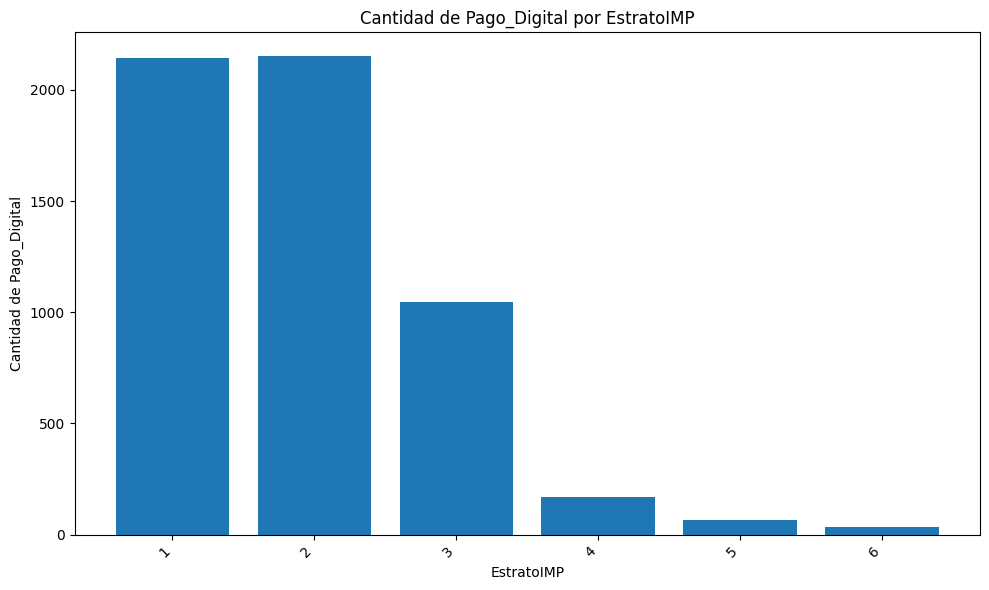

In [11]:
# prompt: realice un grafico de barras en el cual muestre los estratos EstratoIMP en el eje X y la cantidad de registros EstratoIMP , complemente haciendo barras comparativas de estas con la variable Pago_Digital

import matplotlib.pyplot as plt
# Group the data by 'EstratoIMP' and 'Pago_Digital' and count the occurrences
df_grouped = df.groupby(['EstratoIMP', 'Pago_Digital'])['EstratoIMP'].count().unstack()

# Create a bar plot
ax = df_grouped.plot(kind='bar', figsize=(12, 6))

# Set labels and title
plt.xlabel('EstratoIMP')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por EstratoIMP y Pago_Digital')

# Add legend
plt.legend(title='Pago_Digital')

# Show the plot
plt.show()


## Analisis Univariado Cualitativas

Variable Target

<ipython-input-21-6d51d7b90e75>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.countplot(x='Monedero_Digital', data=df, palette='hls')


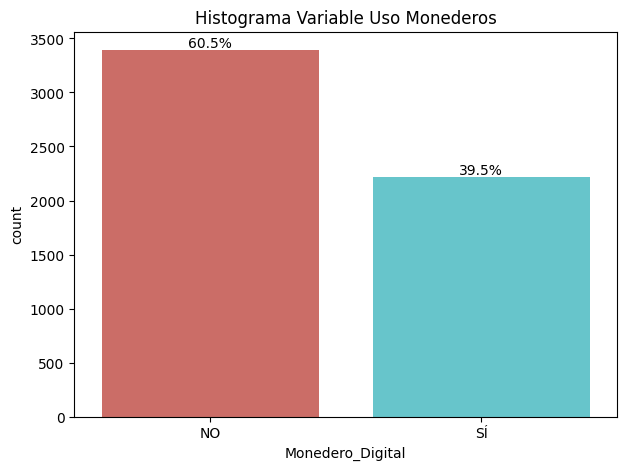

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(7, 5))
ax0 = sns.countplot(x='Monedero_Digital', data=df, palette='hls')


total = len(df)  # Total de observaciones
for p in ax0.patches:
    height = p.get_height()
    ax0.annotate(f'{height / total:.1%}',  # Calcula el porcentaje y lo muestra con 1 decimal
                (p.get_x() + p.get_width() / 2, height),  # Coordenadas del texto
                ha='center', va='bottom')
plt.title('Histograma Variable Uso Monederos')
# Muestra el gráfico
plt.show()
plt.savefig('count_plot')




Analisis Rango Ingresos

In [ ]:
tabla_frecuencias = df['Rango_ingresos'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100

tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias -Rango_ingresos'

# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias -Rango_ingresos
╒═════════════════════════╤══════════════╤═══════════════════════╕
│ Valor                   │   Frecuencia │   Frecuencia Relativa │
╞═════════════════════════╪══════════════╪═══════════════════════╡
│ < 250.000               │         1071 │              19.0909  │
├─────────────────────────┼──────────────┼───────────────────────┤
│ > 750.001 < 1.000.000   │          980 │              17.4688  │
├─────────────────────────┼──────────────┼───────────────────────┤
│ > 250.001 < 500.000     │          837 │              14.9198  │
├─────────────────────────┼──────────────┼───────────────────────┤
│ > 1.000.001 < 1.500.000 │          773 │              13.779   │
├─────────────────────────┼──────────────┼───────────────────────┤
│ > 500.001 < 750.000     │          659 │              11.7469  │
├─────────────────────────┼──────────────┼───────────────────────┤
│ > 1.500.001 < 2.000.000 │          488 │               8.69875 │
├────────────────────────

<ipython-input-23-1c9707e8477f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_col, data=data, palette='hls')


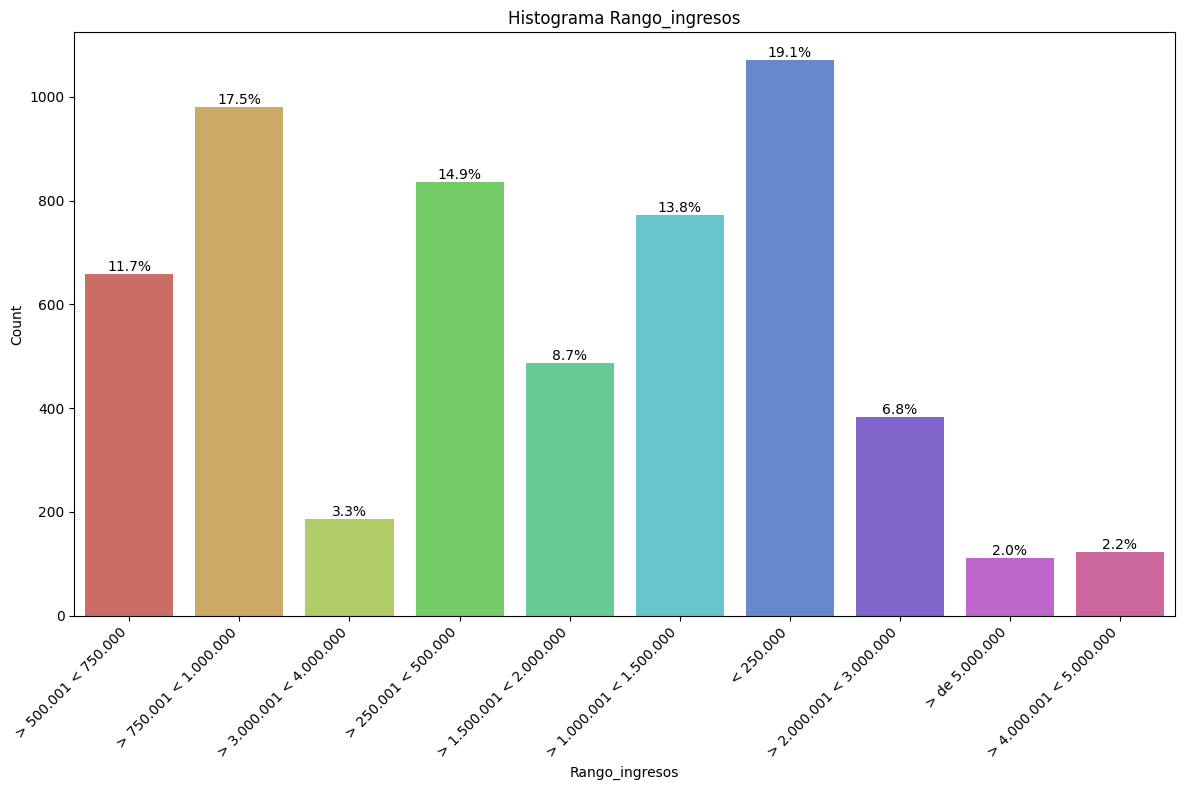

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_percentage(data, x_col, title):
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=x_col, data=data, palette='hls')

    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height,
                f'{height / total:.1%}',
                ha='center', va='bottom')

    plt.title(f'Histograma {title}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')

    # Rotar los nombres en el eje y
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Ajustar el diseño automáticamente

    plt.show()
    plt.savefig(f'count_plot_{title.lower().replace(" ", "_")}.png')

# Ejemplo de uso
plot_count_percentage(df, 'Rango_ingresos', 'Rango_ingresos')

Analisis Rango Gastos

In [ ]:
tabla_frecuencias = df['Rango_gastos'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100

tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Rango_gastos'

# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias - Rango_gastos
╒═════════════════════════╤══════════════╤═══════════════════════╕
│ Valor                   │   Frecuencia │   Frecuencia Relativa │
╞═════════════════════════╪══════════════╪═══════════════════════╡
│ > 500.001 < 750.000     │         1065 │             18.984    │
├─────────────────────────┼──────────────┼───────────────────────┤
│ > 750.001 < 1.000.000   │         1042 │             18.574    │
├─────────────────────────┼──────────────┼───────────────────────┤
│ > 250.001 < 500.000     │         1011 │             18.0214   │
├─────────────────────────┼──────────────┼───────────────────────┤
│ >1.000.001 < 1.500.000  │          845 │             15.0624   │
├─────────────────────────┼──────────────┼───────────────────────┤
│ < 250.000               │          733 │             13.066    │
├─────────────────────────┼──────────────┼───────────────────────┤
│ > 1.500.001 < 2.000.000 │          475 │              8.46702  │
├─────────────────────────

<ipython-input-25-dec2c7a432cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_col, data=data, palette='hls')


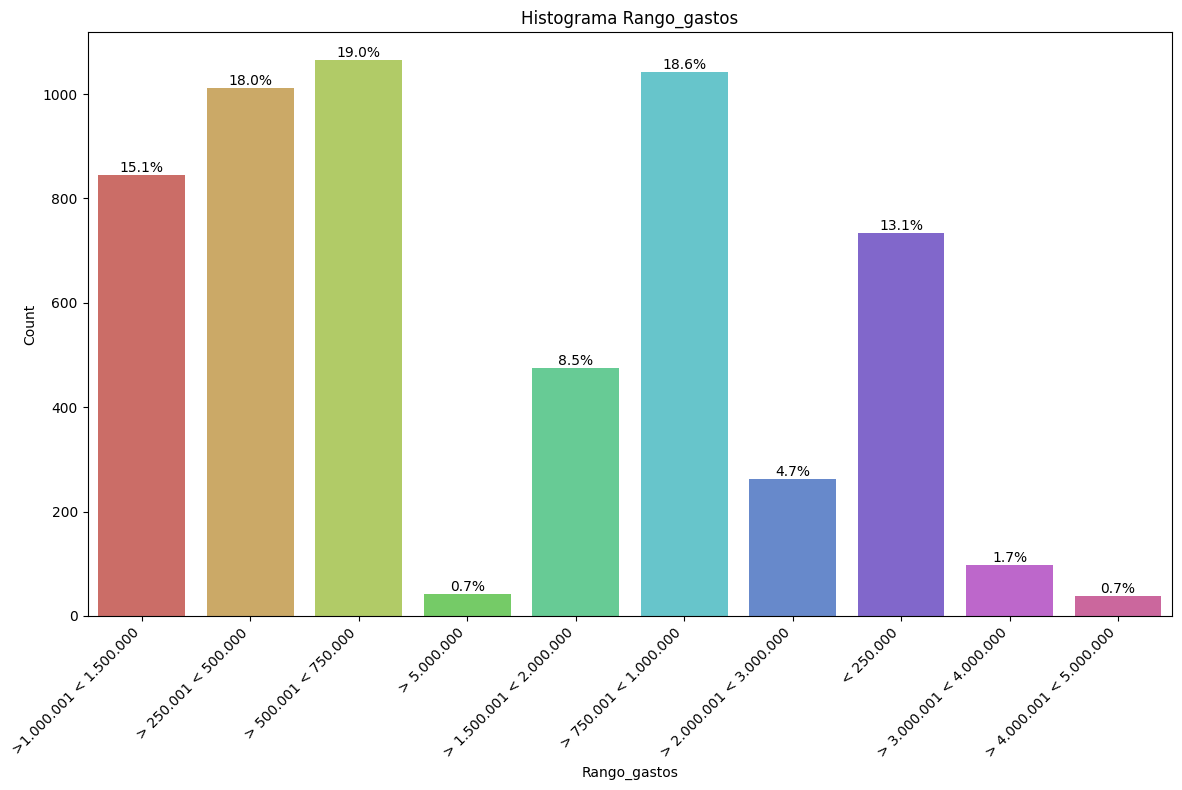

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_percentage(data, x_col, title):
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=x_col, data=data, palette='hls')

    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height,
                f'{height / total:.1%}',
                ha='center', va='bottom')

    plt.title(f'Histograma {title}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')

    # Rotar los nombres en el eje y
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Ajustar el diseño automáticamente

    plt.show()
    plt.savefig(f'count_plot_{title.lower().replace(" ", "_")}.png')

# Ejemplo de uso
plot_count_percentage(df, 'Rango_gastos', 'Rango_gastos')

Analisis Nivel educativo

In [ ]:
tabla_frecuencias = df['Nivel_educativo'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100


tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Nivel educativo'



# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias - Nivel educativo
╒════════════════╤══════════════╤═══════════════════════╕
│ Valor          │   Frecuencia │   Frecuencia Relativa │
╞════════════════╪══════════════╪═══════════════════════╡
│ Secundaria     │         2488 │              44.3494  │
├────────────────┼──────────────┼───────────────────────┤
│ Primaria       │         1215 │              21.6578  │
├────────────────┼──────────────┼───────────────────────┤
│ Técnico        │          709 │              12.6381  │
├────────────────┼──────────────┼───────────────────────┤
│ Universitarios │          597 │              10.6417  │
├────────────────┼──────────────┼───────────────────────┤
│ Tecnólogos     │          318 │               5.66845 │
├────────────────┼──────────────┼───────────────────────┤
│ Ninguno        │          156 │               2.78075 │
├────────────────┼──────────────┼───────────────────────┤
│ Posgrado       │          127 │               2.26381 │
╘════════════════╧══════════════╧

<ipython-input-27-f2cef9a983aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Nivel_educativo', data=df, palette='hls')


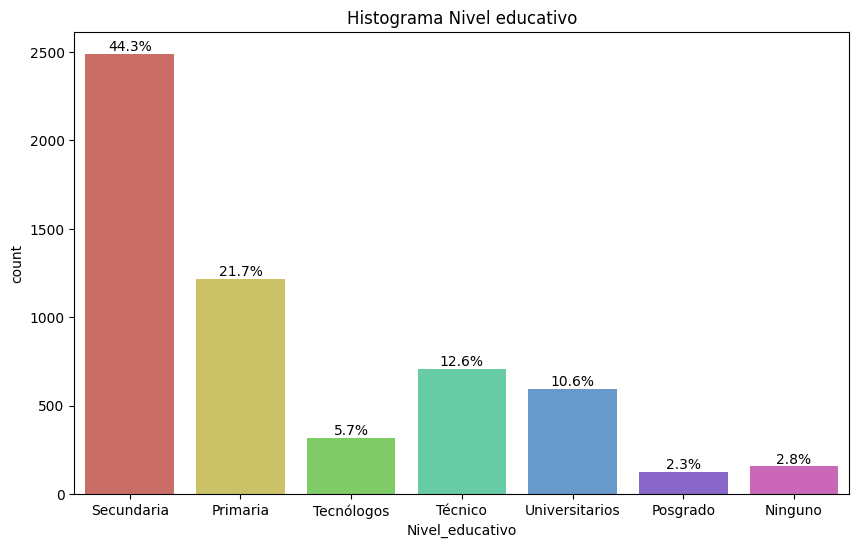

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Nivel_educativo', data=df, palette='hls')


total = len(df)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.1%}',  # Calcula el porcentaje y lo muestra con 1 decimal
                (p.get_x() + p.get_width() / 2, height),  # Coordenadas del texto
                ha='center', va='bottom')
plt.title('Histograma Nivel educativo')
# Muestra el gráfico
plt.show()
plt.savefig('count_plot')



Analisis Uso_tecno_finan

In [ ]:
tabla_frecuencias = df['Uso_tecno_finan'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100


tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Uso_tecnología_financiera'



# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias - Uso_tecnología_financiera
╒═════════╤══════════════╤═══════════════════════╕
│ Valor   │   Frecuencia │   Frecuencia Relativa │
╞═════════╪══════════════╪═══════════════════════╡
│ No      │         4594 │               81.8895 │
├─────────┼──────────────┼───────────────────────┤
│ Sí      │         1016 │               18.1105 │
╘═════════╧══════════════╧═══════════════════════╛


<ipython-input-29-e97f6c4fe06b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Uso_tecno_finan', data=df, palette='hls')


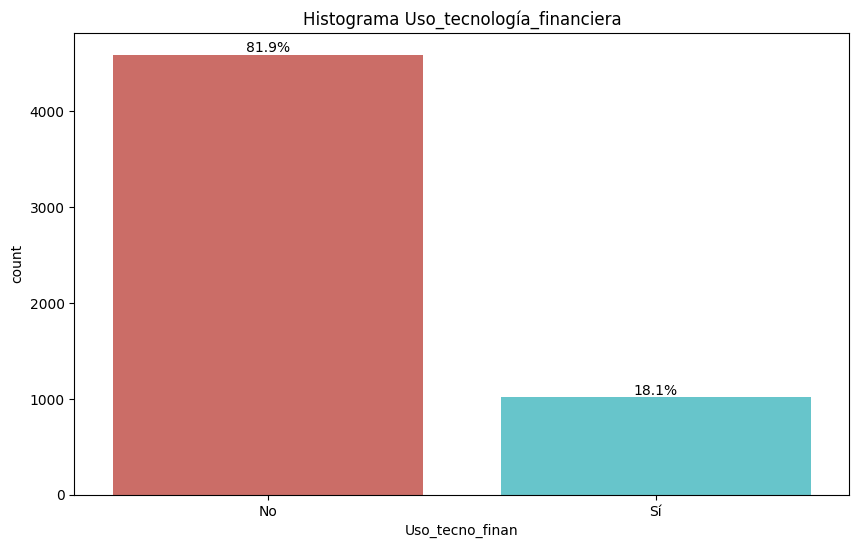

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Uso_tecno_finan', data=df, palette='hls')


total = len(df)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.1%}',  # Calcula el porcentaje y lo muestra con 1 decimal
                (p.get_x() + p.get_width() / 2, height),  # Coordenadas del texto
                ha='center', va='bottom')
plt.title('Histograma Uso_tecnología_financiera')
# Muestra el gráfico
plt.show()
plt.savefig('count_plot')

Analisis Producto Financiero Mas Usado Ultimo Mes

In [ ]:
tabla_frecuencias = df['Producto_finan_Mas_usado'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100


tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Producto Financiero mas usado'



# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias - Producto Financiero mas usado
╒═════════════════════╤══════════════╤═══════════════════════╕
│ Valor               │   Frecuencia │   Frecuencia Relativa │
╞═════════════════════╪══════════════╪═══════════════════════╡
│ No Usó              │         2354 │            41.9608    │
├─────────────────────┼──────────────┼───────────────────────┤
│ Monederos digitales │         1654 │            29.4831    │
├─────────────────────┼──────────────┼───────────────────────┤
│ Cuenta de ahorros   │         1018 │            18.1462    │
├─────────────────────┼──────────────┼───────────────────────┤
│ Tarjeta de débito   │          452 │             8.05704   │
├─────────────────────┼──────────────┼───────────────────────┤
│ Cuenta corriente    │           89 │             1.58645   │
├─────────────────────┼──────────────┼───────────────────────┤
│ Fondo de empleados  │           15 │             0.26738   │
├─────────────────────┼──────────────┼───────────────────────┤
│ 

<ipython-input-31-c12eba9bf1bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_col, data=data, palette='hls')


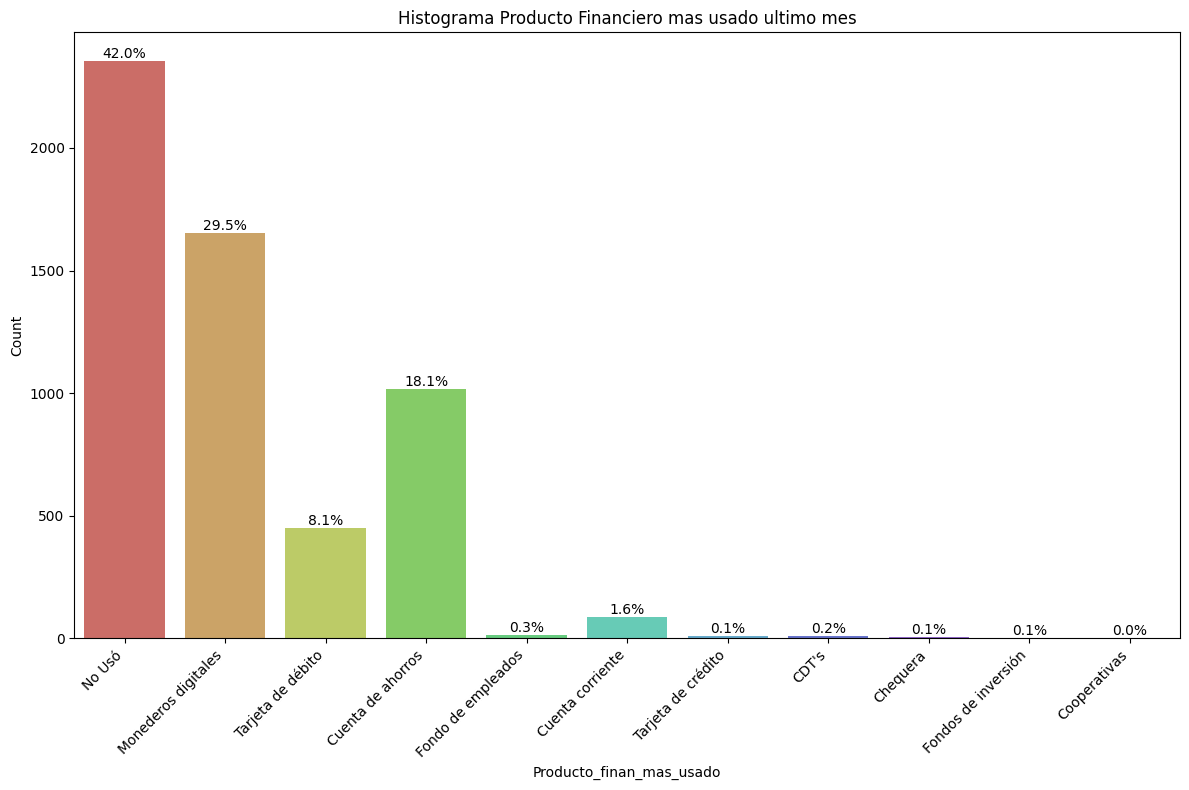

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_percentage(data, x_col, title):
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=x_col, data=data, palette='hls')

    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height,
                f'{height / total:.1%}',
                ha='center', va='bottom')

    plt.title(f'Histograma {title}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')

    # Rotar los nombres en el eje y
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Ajustar el diseño automáticamente

    plt.show()
    plt.savefig(f'count_plot_{title.lower().replace(" ", "_")}.png')

# Ejemplo de uso
plot_count_percentage(df, 'Producto_finan_Mas_usado', 'Producto Financiero mas usado ultimo mes')

Analisis Restricciones uso Productos Financieros

In [ ]:
tabla_frecuencias = df['Reestricciones_Uso_prod_finan'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100


tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Restricciones Uso Productos Financieros'



# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias - Restricciones Uso Productos Financieros
╒═══════════════════════╤══════════════╤═══════════════════════╕
│ Valor                 │   Frecuencia │   Frecuencia Relativa │
╞═══════════════════════╪══════════════╪═══════════════════════╡
│ Otros                 │         3288 │             58.6096   │
├───────────────────────┼──────────────┼───────────────────────┤
│ Ingresos bajos        │          586 │             10.4456   │
├───────────────────────┼──────────────┼───────────────────────┤
│ Trámites              │          438 │              7.80749  │
├───────────────────────┼──────────────┼───────────────────────┤
│ No me sirve           │          195 │              3.47594  │
├───────────────────────┼──────────────┼───────────────────────┤
│ No ofrecido           │          179 │              3.19073  │
├───────────────────────┼──────────────┼───────────────────────┤
│ Desconocimiento       │          143 │              2.54902  │
├───────────────────────┼──

<ipython-input-33-201db31ecc6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_col, data=data, palette='hls')


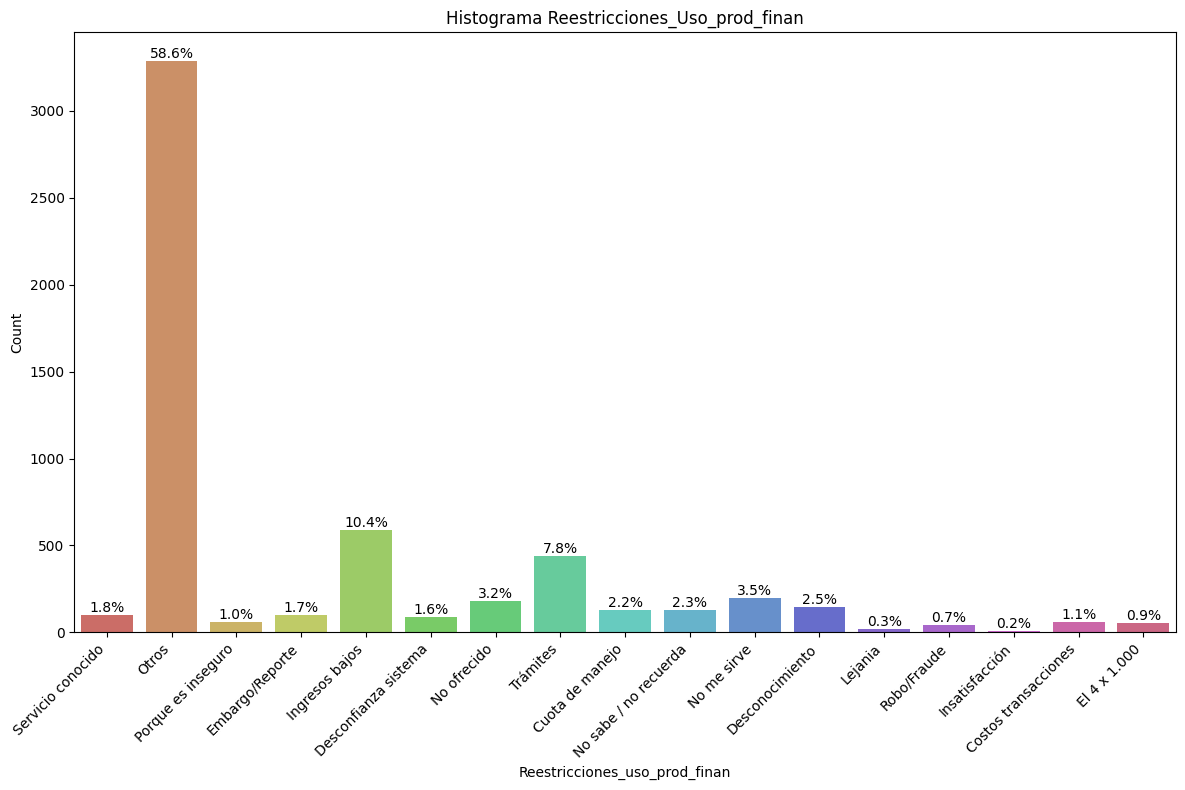

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_percentage(data, x_col, title):
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=x_col, data=data, palette='hls')

    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height,
                f'{height / total:.1%}',
                ha='center', va='bottom')

    plt.title(f'Histograma {title}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')

    # Rotar los nombres en el eje y
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Ajustar el diseño automáticamente

    plt.show()
    plt.savefig(f'count_plot_{title.lower().replace(" ", "_")}.png')

# Ejemplo de uso
plot_count_percentage(df, 'Reestricciones_Uso_prod_finan', 'Reestricciones_Uso_prod_finan')

Analisis Confianza_financiera

In [ ]:
tabla_frecuencias = df['Reestricciones_Uso_prod_finan'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100


tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Confianza_financiera'



# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias - Confianza_financiera
╒═══════════════════════╤══════════════╤═══════════════════════╕
│ Valor                 │   Frecuencia │   Frecuencia Relativa │
╞═══════════════════════╪══════════════╪═══════════════════════╡
│ Otros                 │         3288 │             58.6096   │
├───────────────────────┼──────────────┼───────────────────────┤
│ Ingresos bajos        │          586 │             10.4456   │
├───────────────────────┼──────────────┼───────────────────────┤
│ Trámites              │          438 │              7.80749  │
├───────────────────────┼──────────────┼───────────────────────┤
│ No me sirve           │          195 │              3.47594  │
├───────────────────────┼──────────────┼───────────────────────┤
│ No ofrecido           │          179 │              3.19073  │
├───────────────────────┼──────────────┼───────────────────────┤
│ Desconocimiento       │          143 │              2.54902  │
├───────────────────────┼──────────────┼──────

<ipython-input-35-53084ba6fef4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Confianza_financiera', data=df, palette='hls')


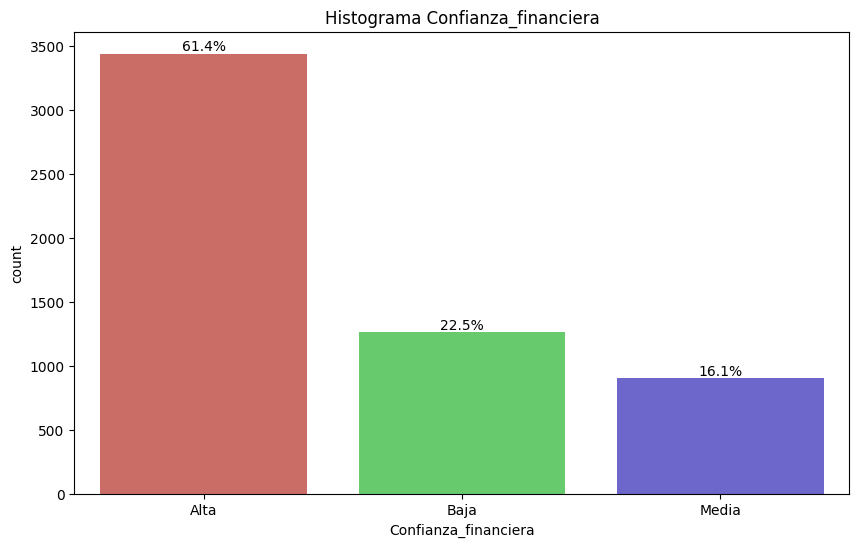

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Confianza_financiera', data=df, palette='hls')


total = len(df)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.1%}',  # Calcula el porcentaje y lo muestra con 1 decimal
                (p.get_x() + p.get_width() / 2, height),  # Coordenadas del texto
                ha='center', va='bottom')
plt.title('Histograma Confianza_financiera')
# Muestra el gráfico
plt.show()
plt.savefig('count_plot')

Analisis Fuente_Ingresos

In [ ]:
tabla_frecuencias = df['Fuente_Ingresos'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100


tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Fuente_Ingresos'



# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias - Fuente_Ingresos
╒═══════════════════════════════╤══════════════╤═══════════════════════╕
│ Valor                         │   Frecuencia │   Frecuencia Relativa │
╞═══════════════════════════════╪══════════════╪═══════════════════════╡
│ Otros no identificados        │         2238 │             39.893    │
├───────────────────────────────┼──────────────┼───────────────────────┤
│ Salarios                      │         1674 │             29.8396   │
├───────────────────────────────┼──────────────┼───────────────────────┤
│ Ingreso por ventas            │          440 │              7.84314  │
├───────────────────────────────┼──────────────┼───────────────────────┤
│ Transferencias familiares     │          372 │              6.63102  │
├───────────────────────────────┼──────────────┼───────────────────────┤
│ Honorarios                    │          365 │              6.50624  │
├───────────────────────────────┼──────────────┼───────────────────────┤
│ Arriendos 

<ipython-input-37-0be2410aeba8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_col, data=data, palette='hls')


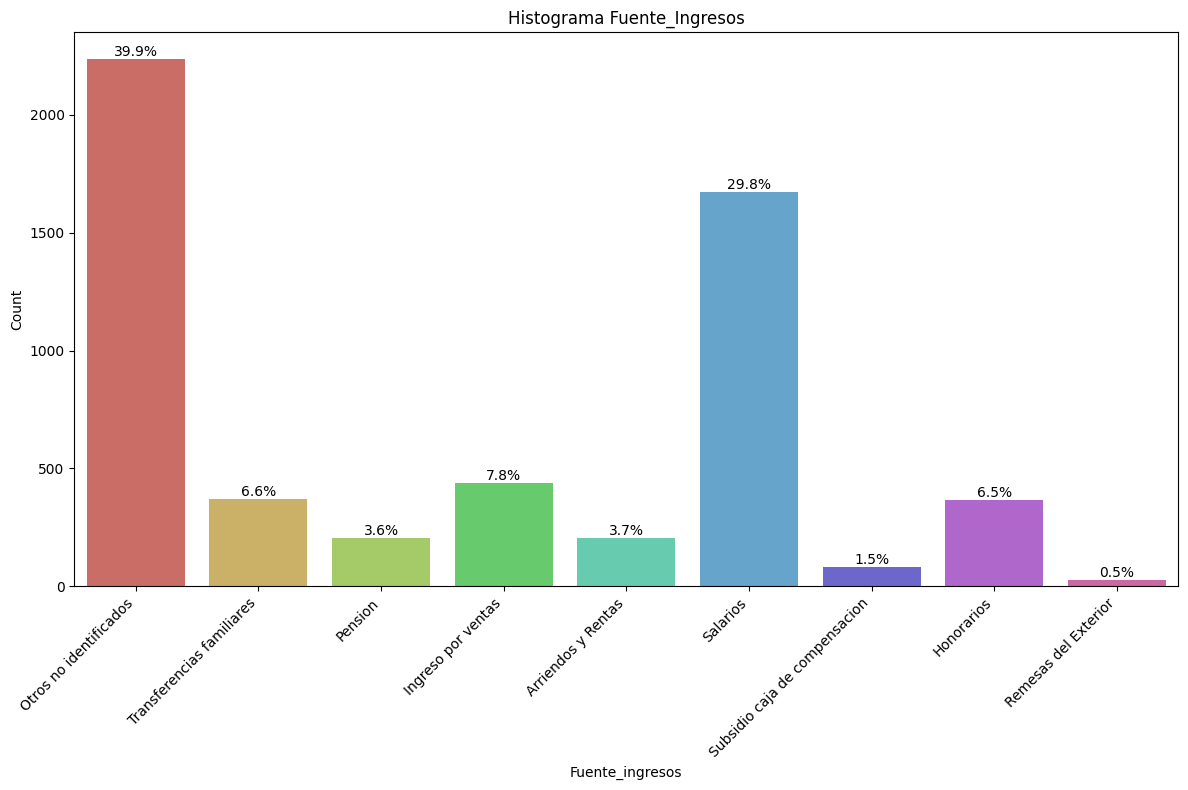

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_percentage(data, x_col, title):
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=x_col, data=data, palette='hls')

    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height,
                f'{height / total:.1%}',
                ha='center', va='bottom')

    plt.title(f'Histograma {title}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')

    # Rotar los nombres en el eje y
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Ajustar el diseño automáticamente

    plt.show()
    plt.savefig(f'count_plot_{title.lower().replace(" ", "_")}.png')

# Ejemplo de uso
plot_count_percentage(df, 'Fuente_Ingresos', 'Fuente_Ingresos')

Analisis Medio Pago

In [ ]:
tabla_frecuencias = df['Medio_pago_Gastos'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100


tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Medio_pago_Gastos'



# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)

Tabla de Frecuencias - Medio_pago_Gastos
╒═════════════════════╤══════════════╤═══════════════════════╕
│ Valor               │   Frecuencia │   Frecuencia Relativa │
╞═════════════════════╪══════════════╪═══════════════════════╡
│ Efectivo            │         4204 │            74.9376    │
├─────────────────────┼──────────────┼───────────────────────┤
│ Monederos digitales │          602 │            10.7308    │
├─────────────────────┼──────────────┼───────────────────────┤
│ Tarjeta débito      │          528 │             9.41176   │
├─────────────────────┼──────────────┼───────────────────────┤
│ Otro                │          132 │             2.35294   │
├─────────────────────┼──────────────┼───────────────────────┤
│ Tarjeta de crédito  │           81 │             1.44385   │
├─────────────────────┼──────────────┼───────────────────────┤
│ Ninguno             │           43 │             0.766488  │
├─────────────────────┼──────────────┼───────────────────────┤
│ Código QR   

<ipython-input-39-ddd939d6c520>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_col, data=data, palette='hls')


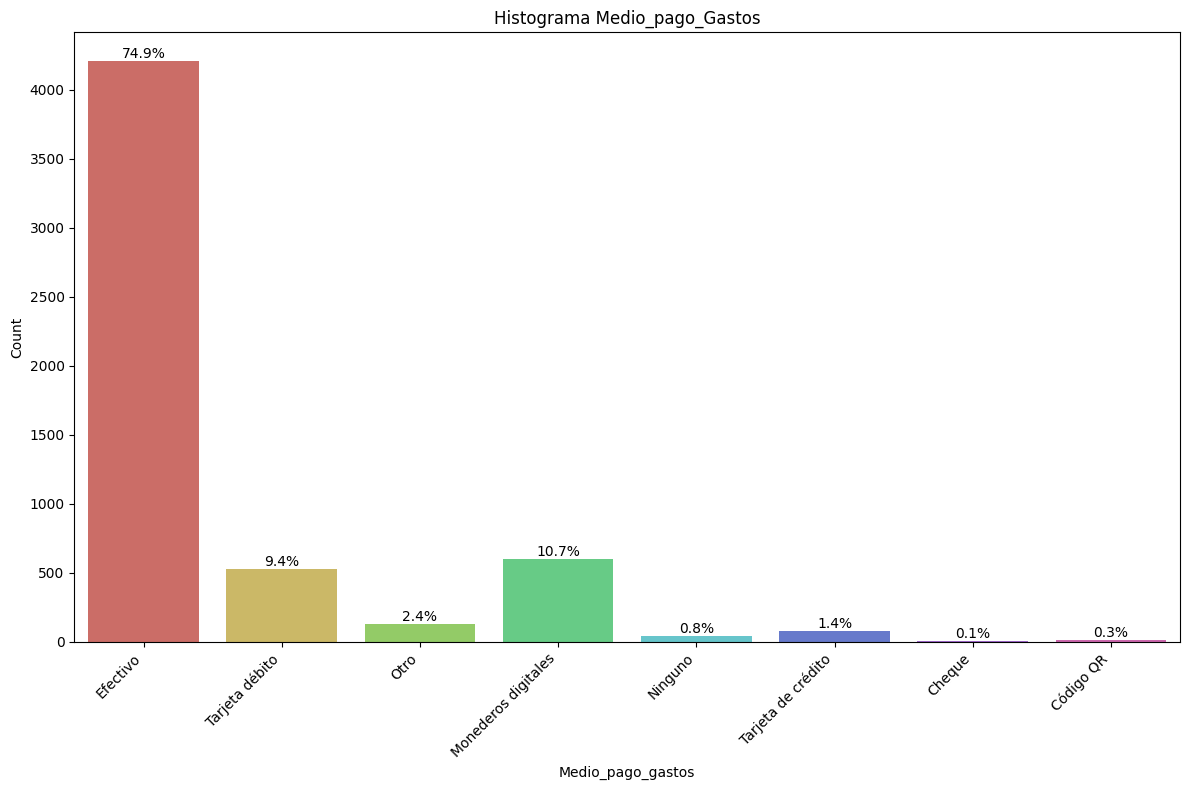

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_percentage(data, x_col, title):
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=x_col, data=data, palette='hls')

    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height,
                f'{height / total:.1%}',
                ha='center', va='bottom')

    plt.title(f'Histograma {title}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')

    # Rotar los nombres en el eje y
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Ajustar el diseño automáticamente

    plt.show()
    plt.savefig(f'count_plot_{title.lower().replace(" ", "_")}.png')

# Ejemplo de uso
plot_count_percentage(df, 'Medio_pago_Gastos', 'Medio_pago_Gastos')

analisis Razon_preferencia_pago

In [ ]:
tabla_frecuencias = df['Razon_preferencia_pago'].value_counts().reset_index()

# Renombrar las columnas de la tabla de frecuencias
tabla_frecuencias.columns = ['Valor', 'Frecuencia']

# Calcula las frecuencias relativas
total_filas = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa'] = (tabla_frecuencias['Frecuencia'] / total_filas)*100


tabla_frecuencias = tabulate(tabla_frecuencias, headers='keys', tablefmt='fancy_grid', showindex=False)
titulo = 'Tabla de Frecuencias - Razon_preferencia_pago'



# Mostrar la tabla de frecuencias
print(titulo)
print(tabla_frecuencias)


Tabla de Frecuencias - Razon_preferencia_pago
╒══════════════════════════╤══════════════╤═══════════════════════╕
│ Valor                    │   Frecuencia │   Frecuencia Relativa │
╞══════════════════════════╪══════════════╪═══════════════════════╡
│ Más facil                │         2174 │             38.7522   │
├──────────────────────────┼──────────────┼───────────────────────┤
│ No acceso a otros medios │          916 │             16.328    │
├──────────────────────────┼──────────────┼───────────────────────┤
│ Más rapido               │          780 │             13.9037   │
├──────────────────────────┼──────────────┼───────────────────────┤
│ Usualmente aceptado      │          442 │              7.87879  │
├──────────────────────────┼──────────────┼───────────────────────┤
│ Descuentos               │          332 │              5.918    │
├──────────────────────────┼──────────────┼───────────────────────┤
│ Mas seguro               │          328 │              5.8467   │
├─

<ipython-input-41-5a7dd7b1a1c8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_col, data=data, palette='hls')


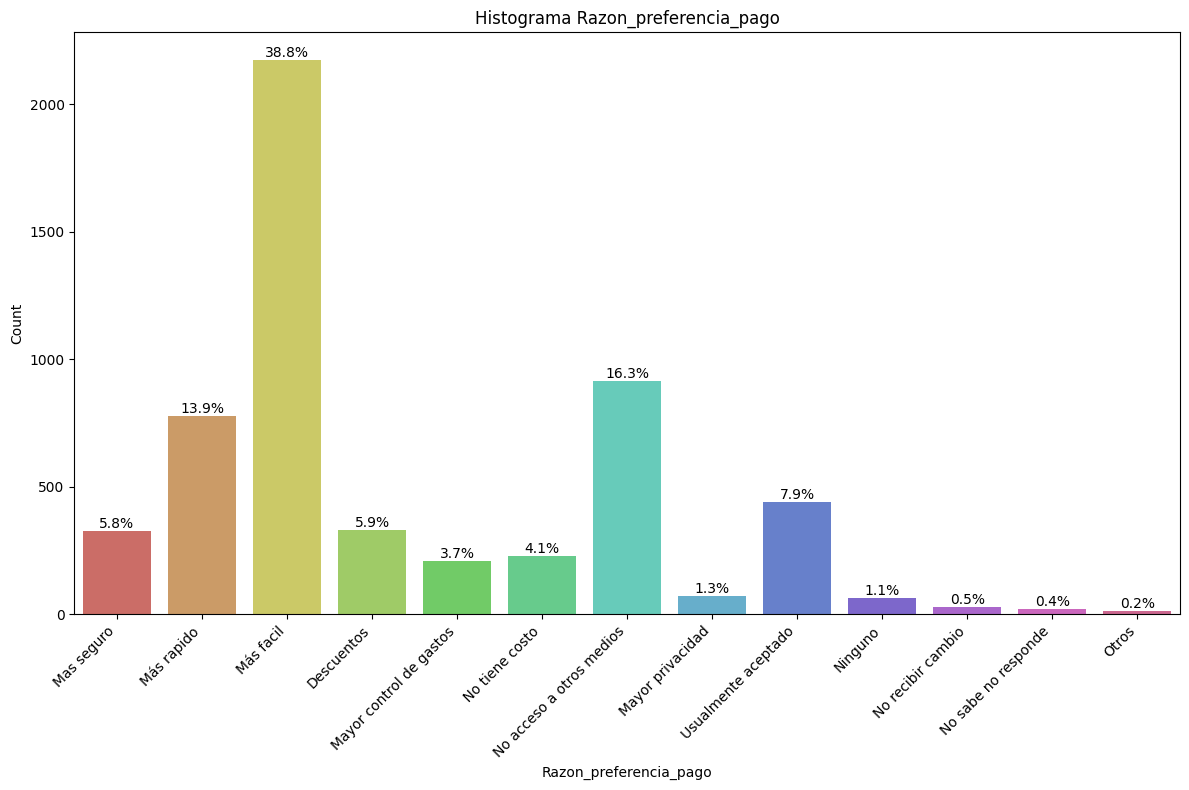

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_percentage(data, x_col, title):
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=x_col, data=data, palette='hls')

    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height,
                f'{height / total:.1%}',
                ha='center', va='bottom')

    plt.title(f'Histograma {title}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')

    # Rotar los nombres en el eje y
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Ajustar el diseño automáticamente

    plt.show()
    plt.savefig(f'count_plot_{title.lower().replace(" ", "_")}.png')

# Ejemplo de uso
plot_count_percentage(df, 'Razon_preferencia_pago', 'Razon_preferencia_pago')

## Análisis Bivariado Cualitativas

Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

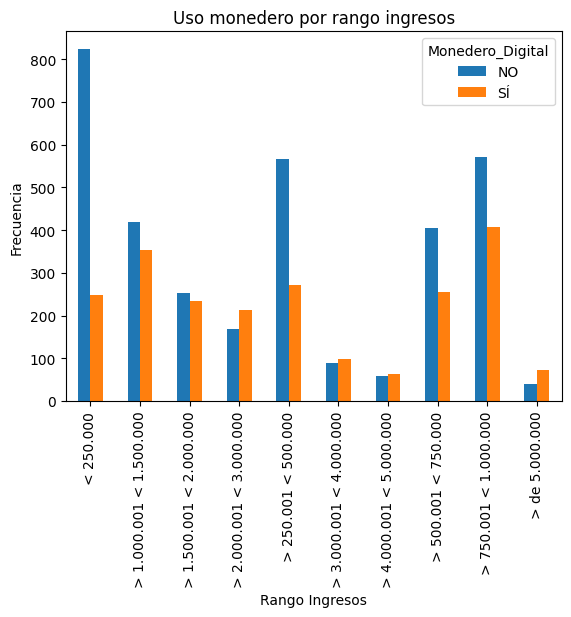

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Rango_ingresos,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por rango ingresos')
plt.xlabel('Rango Ingresos')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

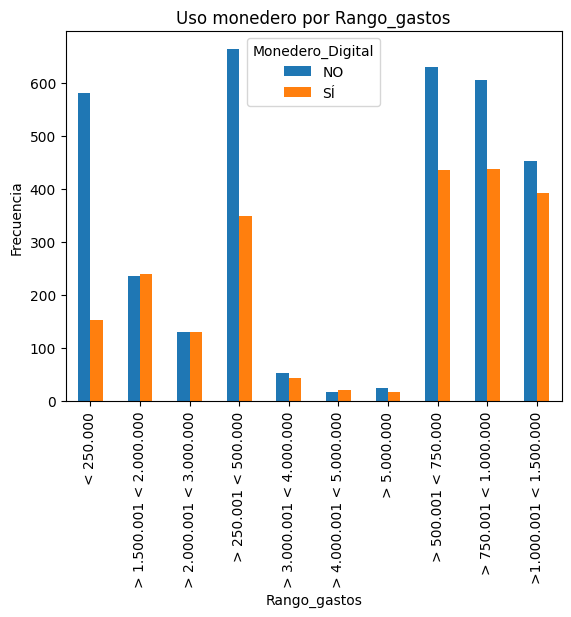

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Rango_gastos,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por Rango_gastos')
plt.xlabel('Rango_gastos')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

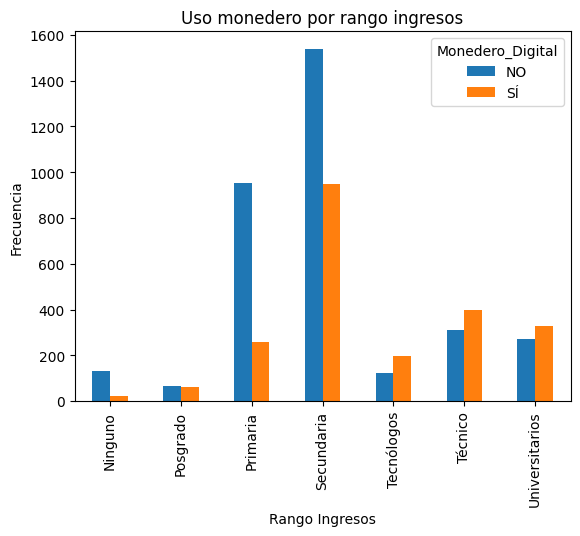

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Nivel_educativo,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por rango ingresos')
plt.xlabel('Rango Ingresos')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

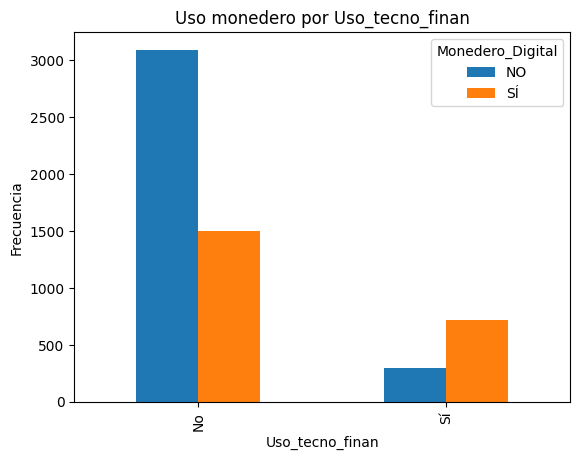

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Uso_tecno_finan,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por Uso_tecno_finan')
plt.xlabel('Uso_tecno_finan')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

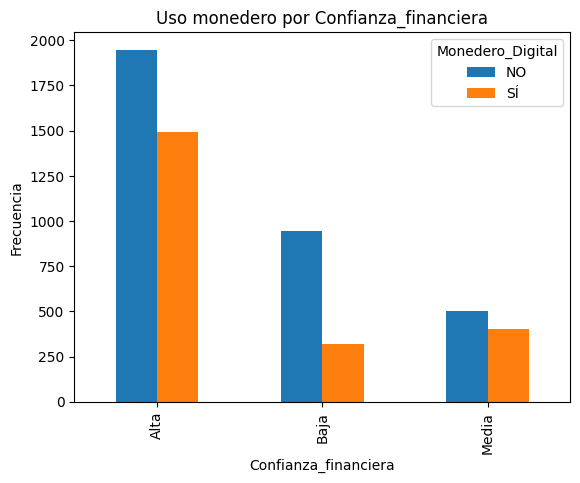

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Confianza_financiera,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por Confianza_financiera')
plt.xlabel('Confianza_financiera')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

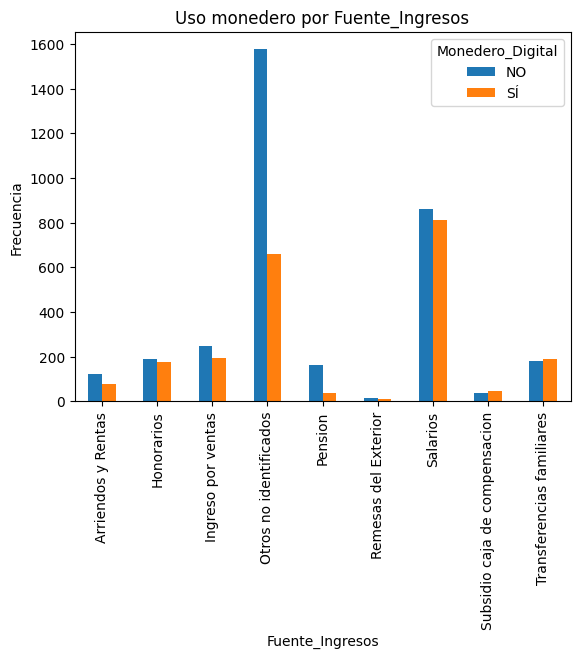

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Fuente_Ingresos,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por Fuente_Ingresos')
plt.xlabel('Fuente_Ingresos')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

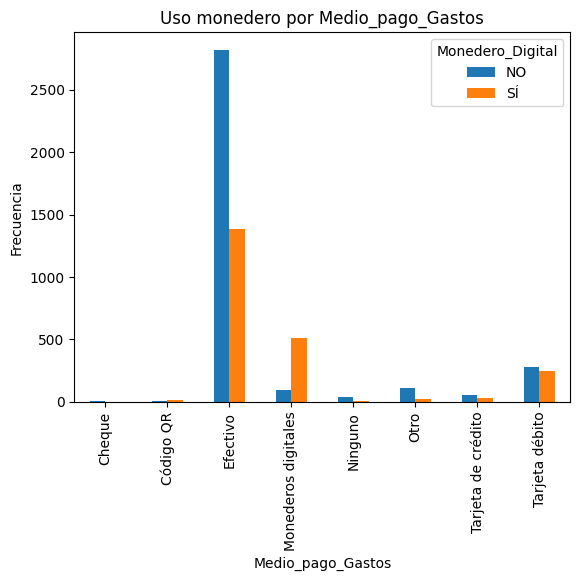

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Medio_pago_Gastos,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por Medio_pago_Gastos')
plt.xlabel('Medio_pago_Gastos')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

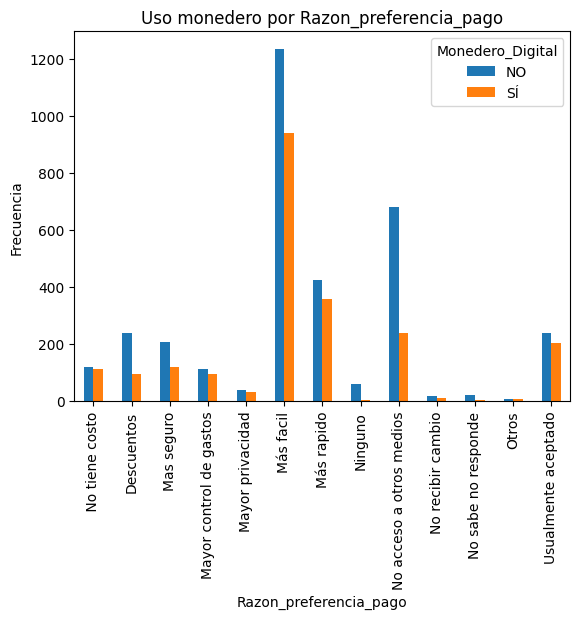

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Razon_preferencia_pago,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por Razon_preferencia_pago')
plt.xlabel('Razon_preferencia_pago')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

<Figure size 1000x600 with 0 Axes>

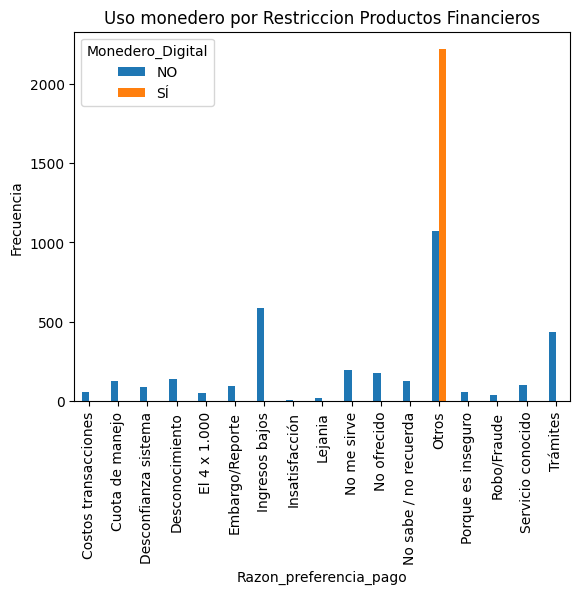

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(df.Reestricciones_Uso_prod_finan,df.Monedero_Digital).plot(kind='bar')
plt.title('Uso monedero por Restriccion Productos Financieros')
plt.xlabel('Razon_preferencia_pago')
plt.ylabel('Frecuencia')

## Análisis descriptivo total

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
df.Monedero_Digital.replace({'NO': 0, 'SÍ': 1}, inplace=True)

<ipython-input-36-ff7d6c7e964e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Monedero_Digital.replace({'NO': 0, 'SÍ': 1}, inplace=True)
<ipython-input-36-ff7d6c7e964e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Monedero_Digital.replace({'NO': 0, 'SÍ': 1}, inplace=True)


In [ ]:
df.Monedero_Digital

0       1
1       1
2       0
3       0
4       1
       ..
5605    0
5606    1
5607    0
5608    1
5609    1
Name: Monedero_Digital, Length: 5610, dtype: int64

In [ ]:
report=sv.analyze(df, target_feat = 'Monedero_Digital' )

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
from IPython.display import HTML
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



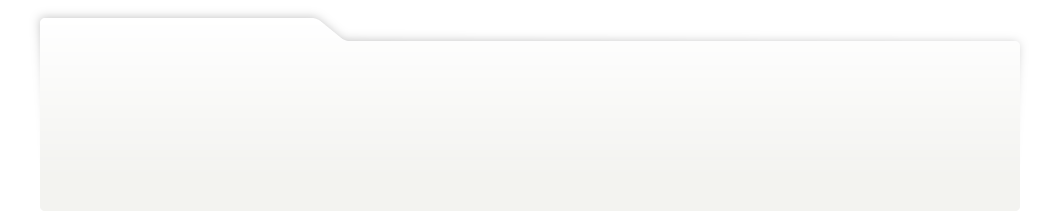
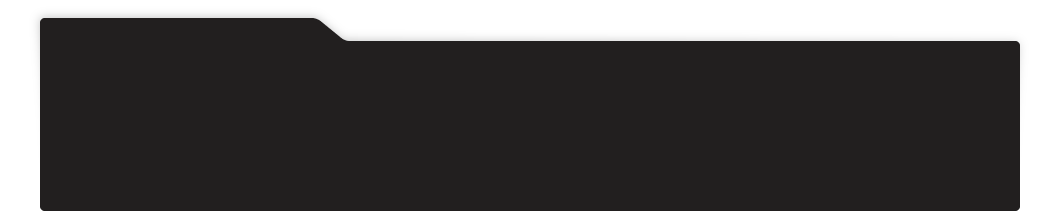
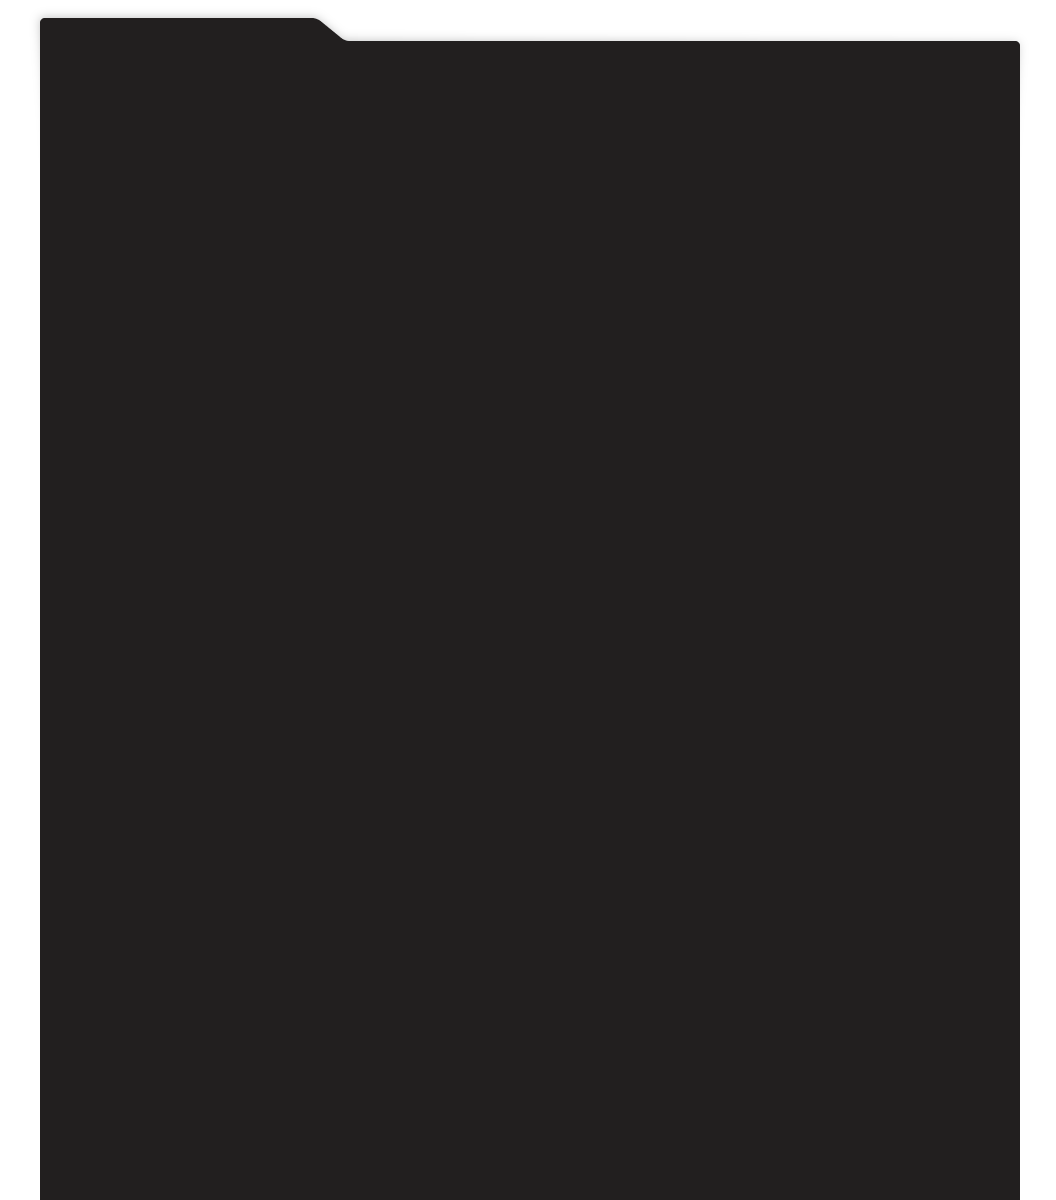
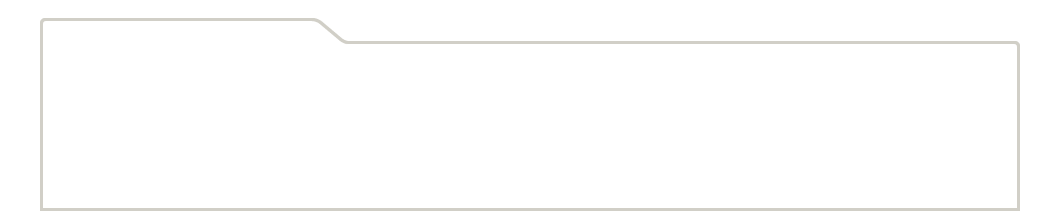
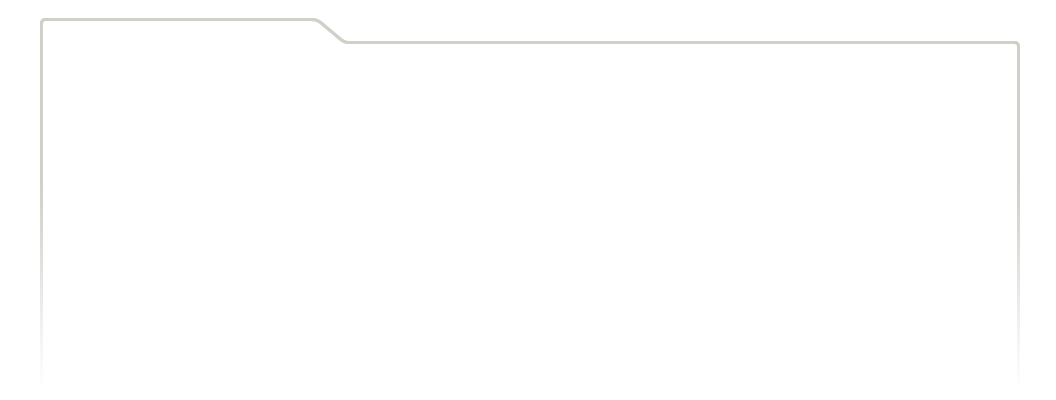
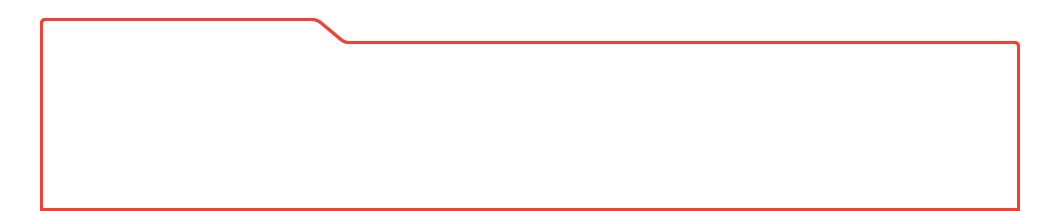
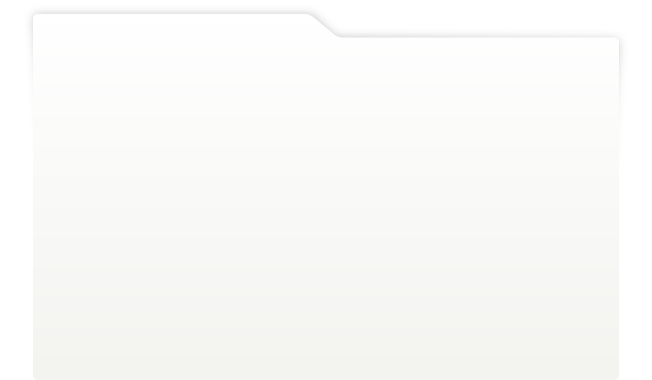
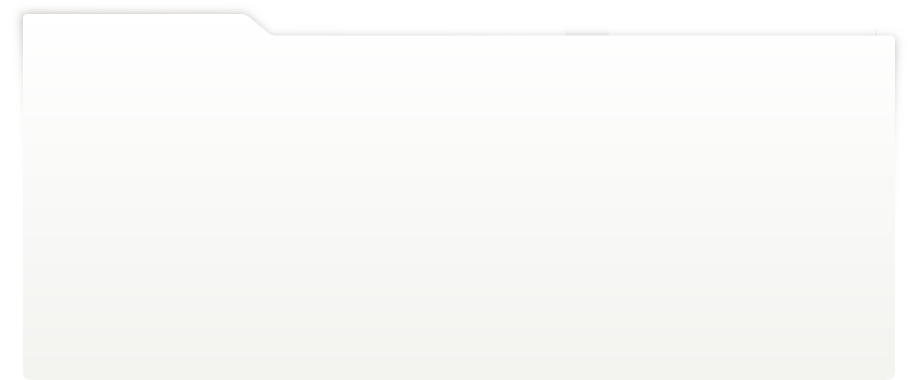
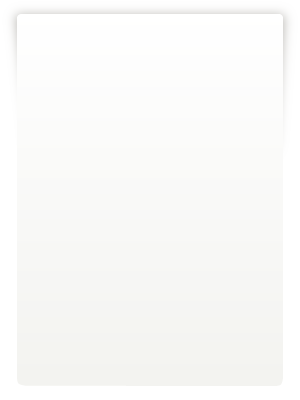
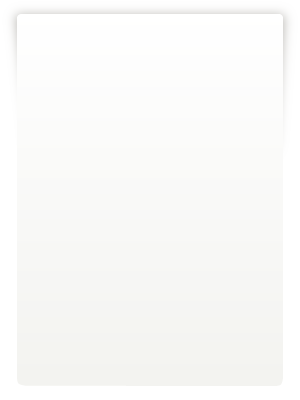
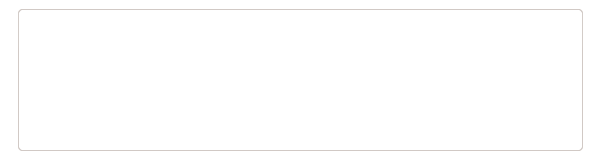
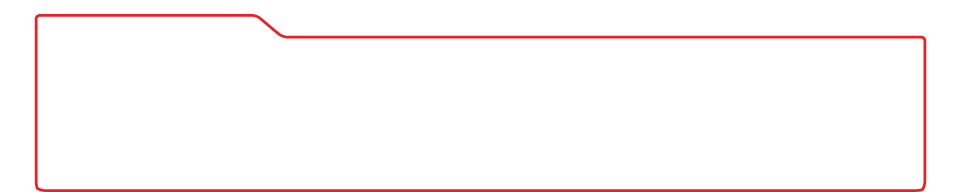
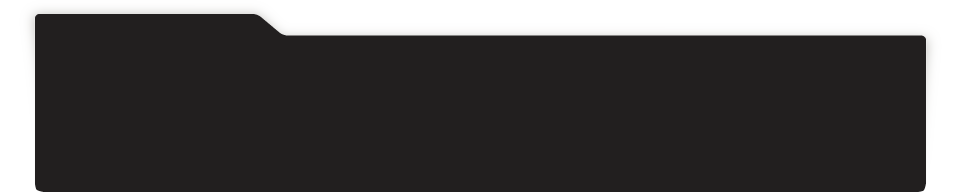
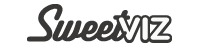
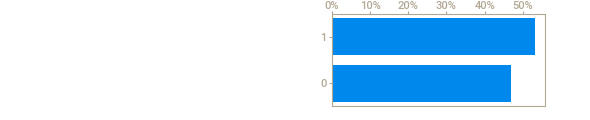
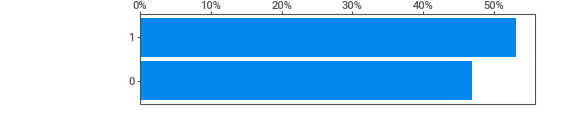
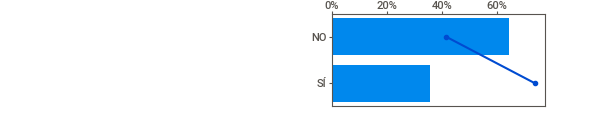
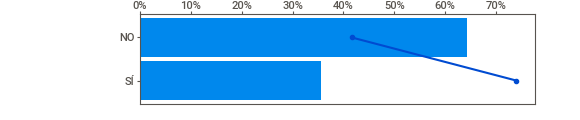
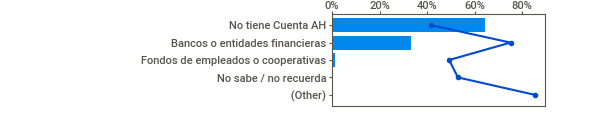
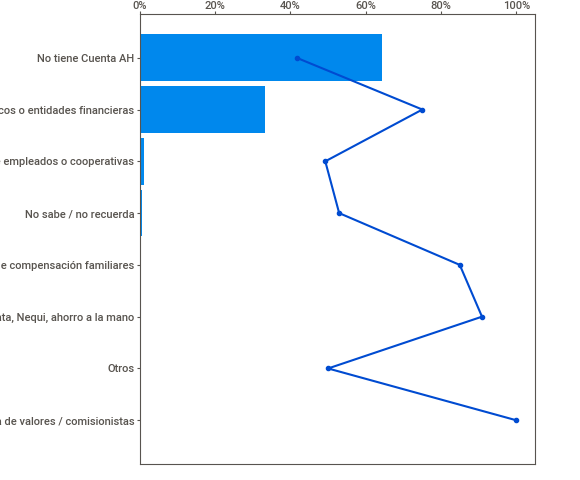
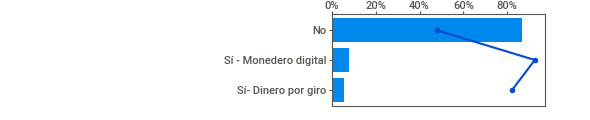
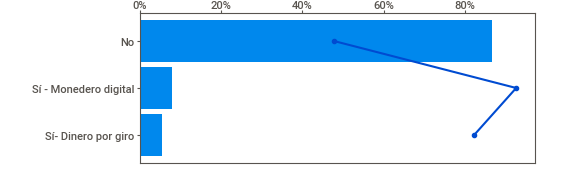
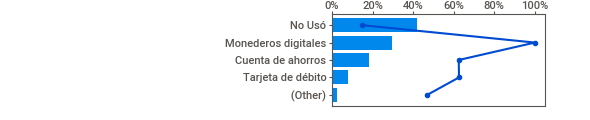
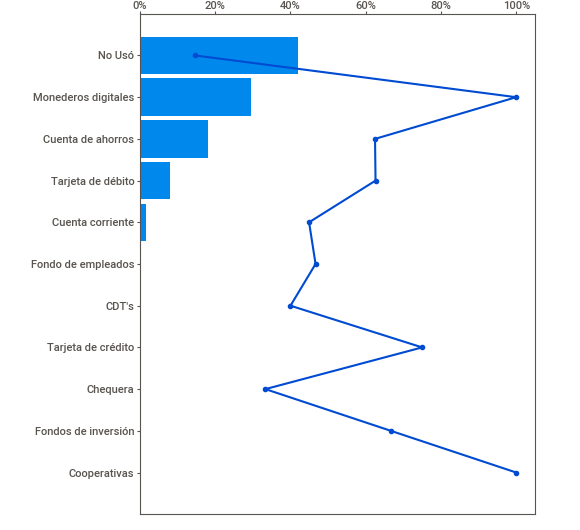
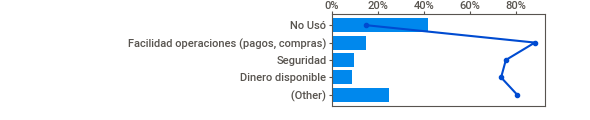
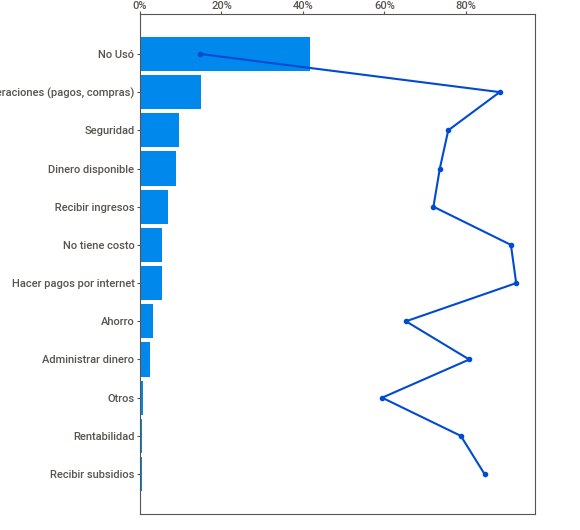
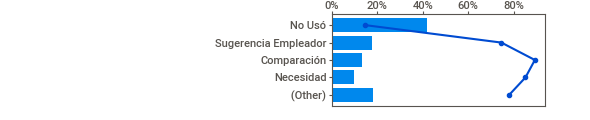
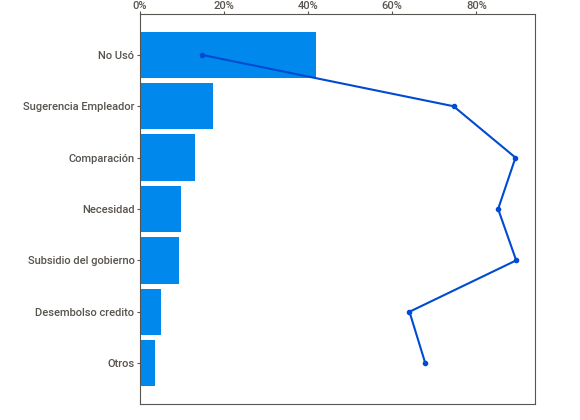
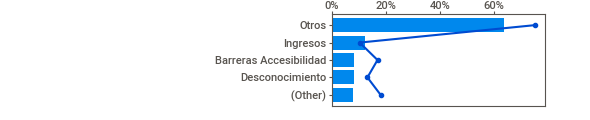
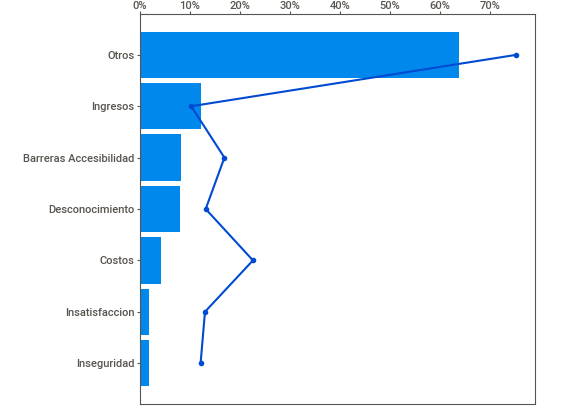
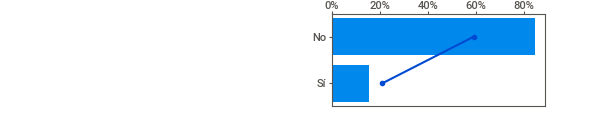
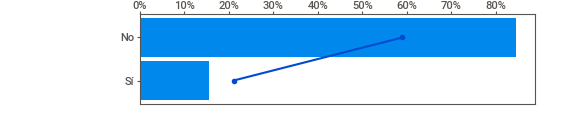
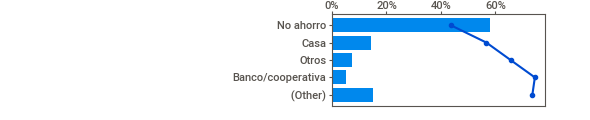
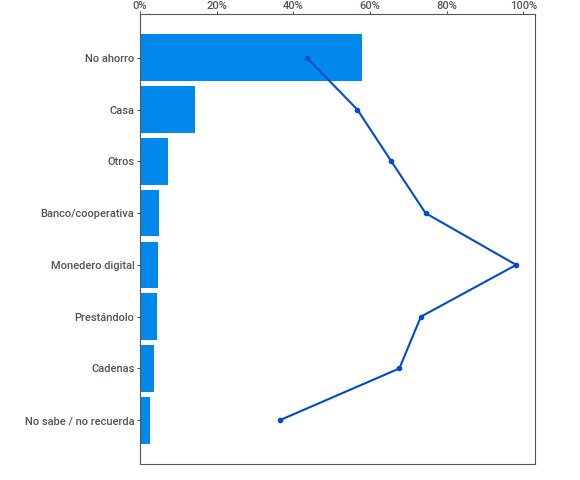
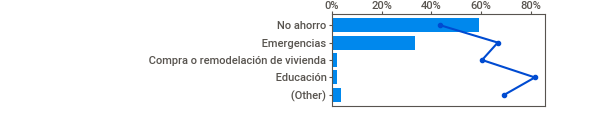
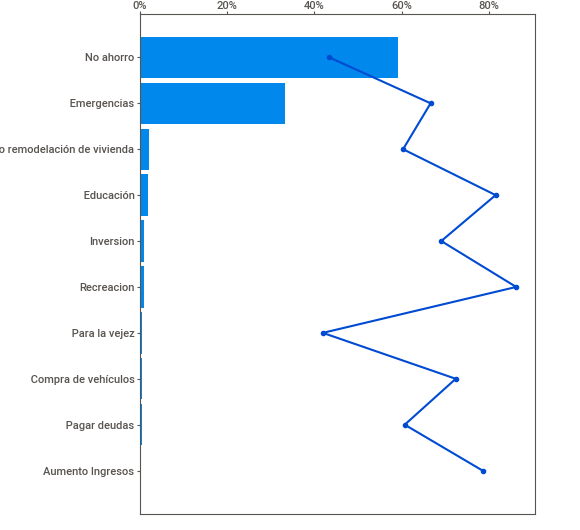
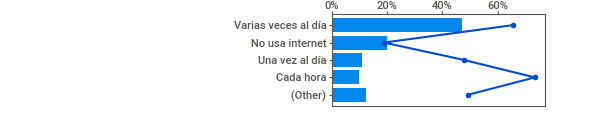
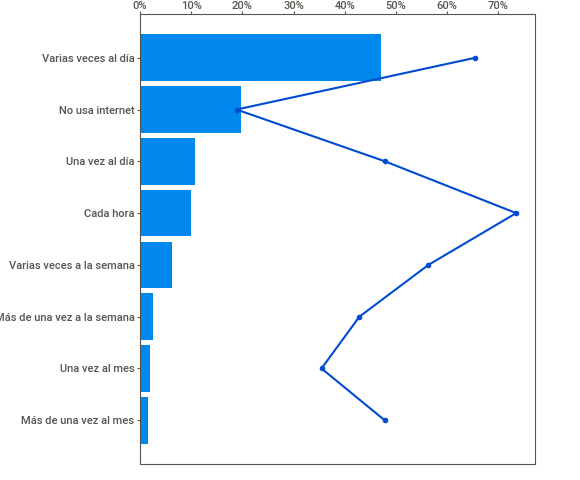
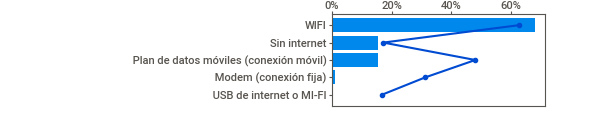
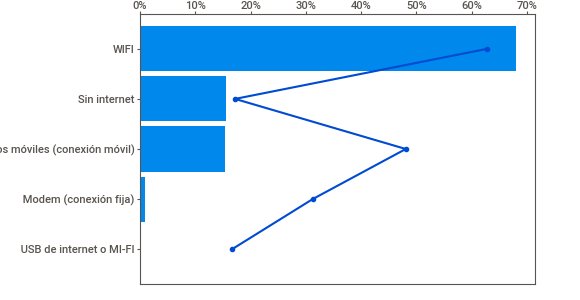
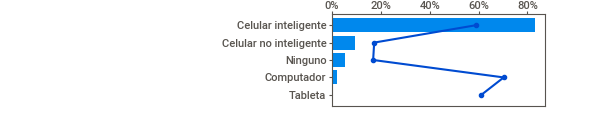
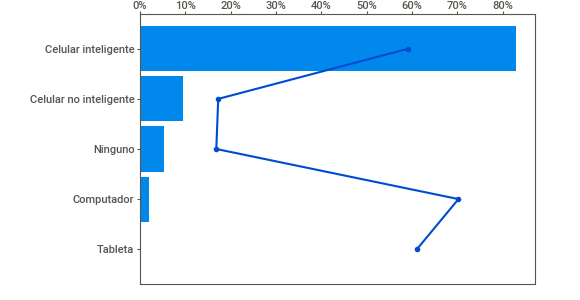
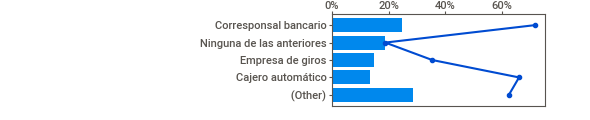
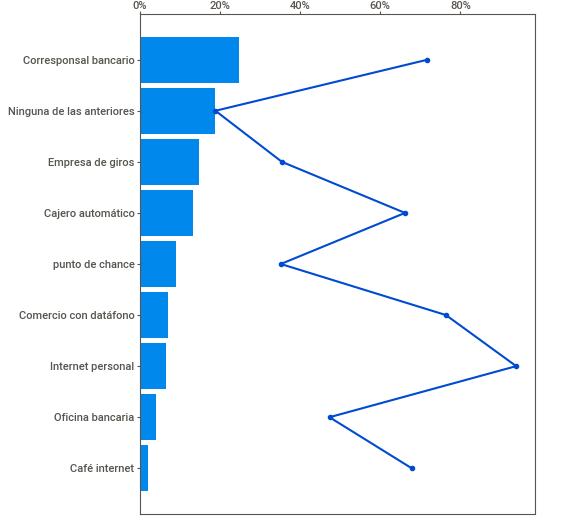
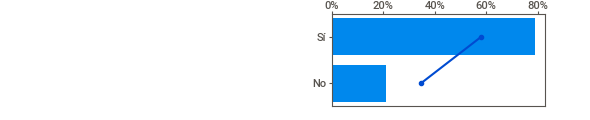
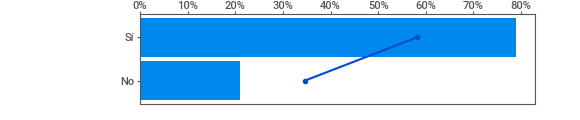
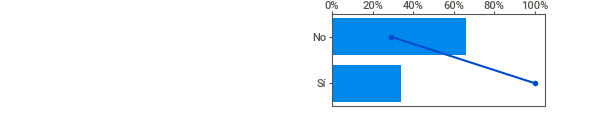
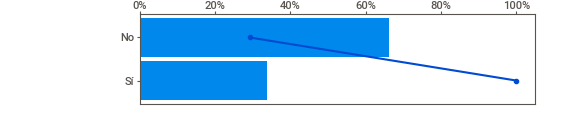
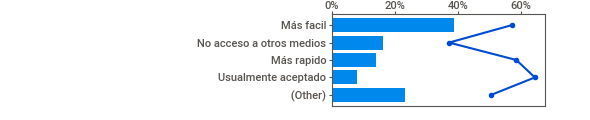
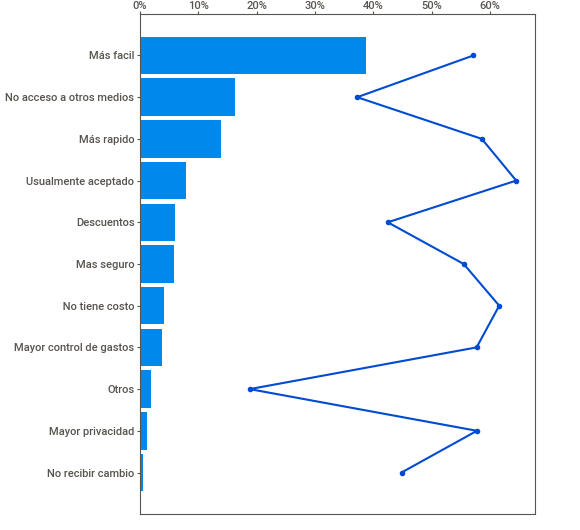
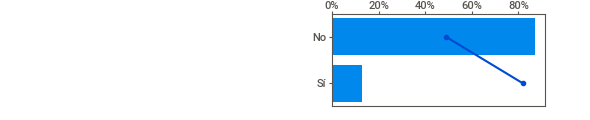
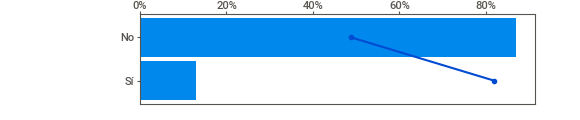
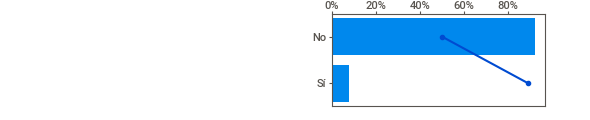
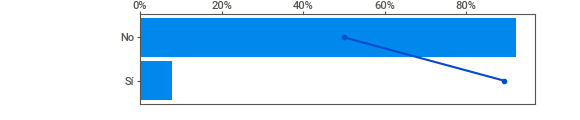
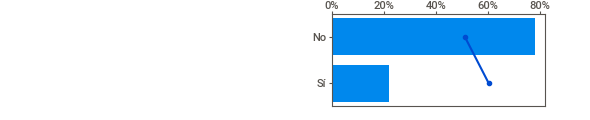
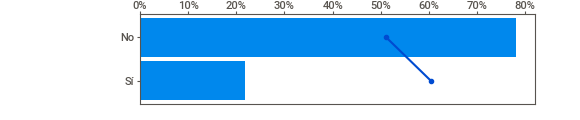
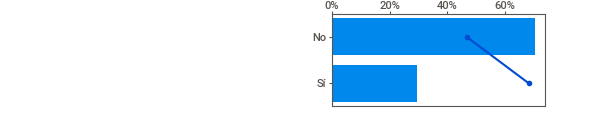
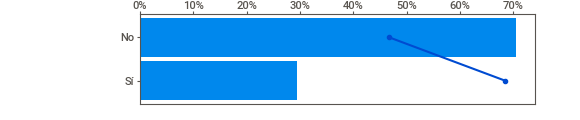
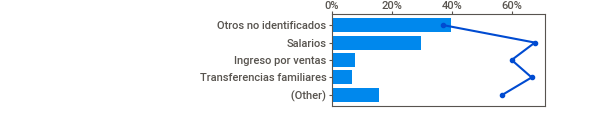
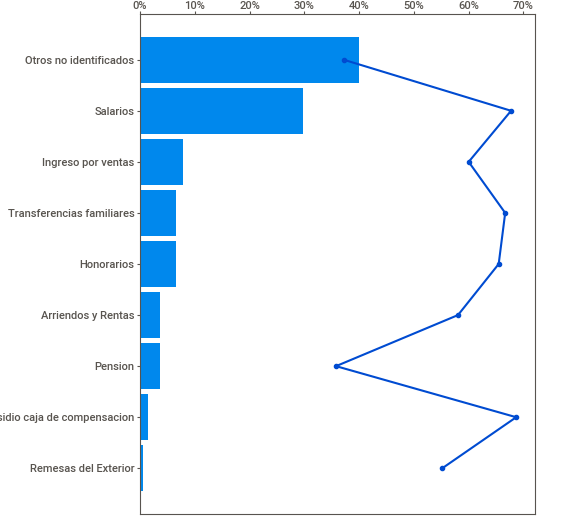
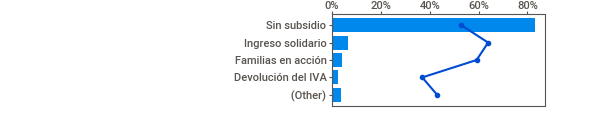
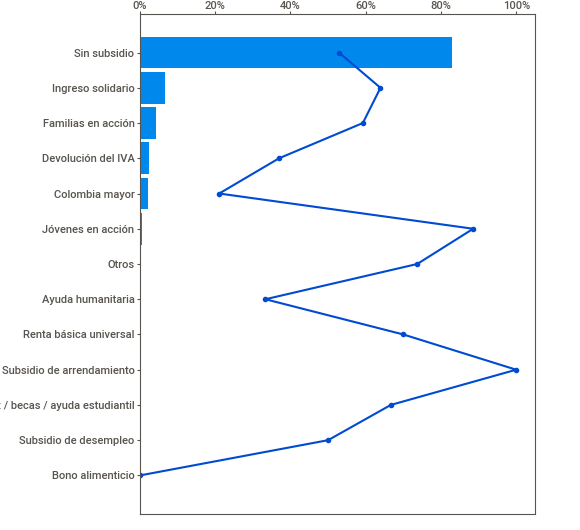
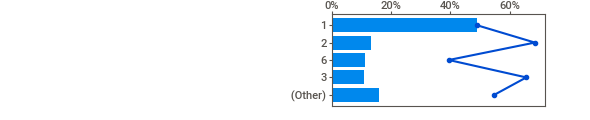
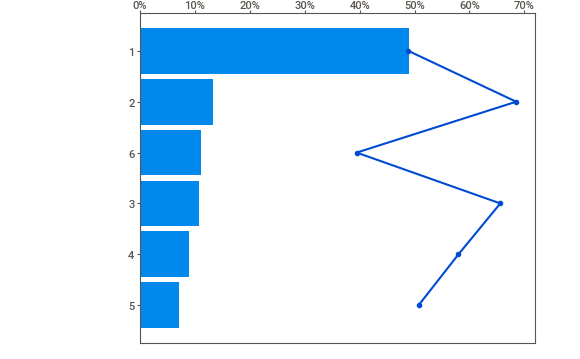
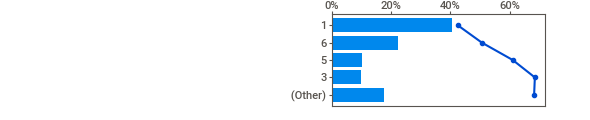
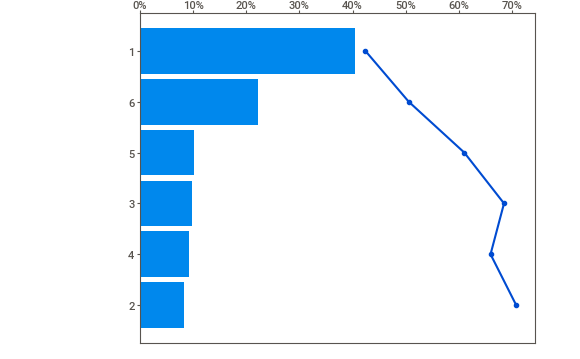
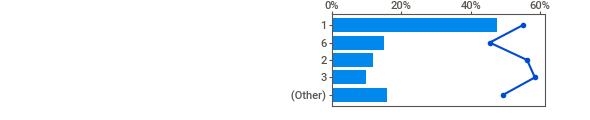
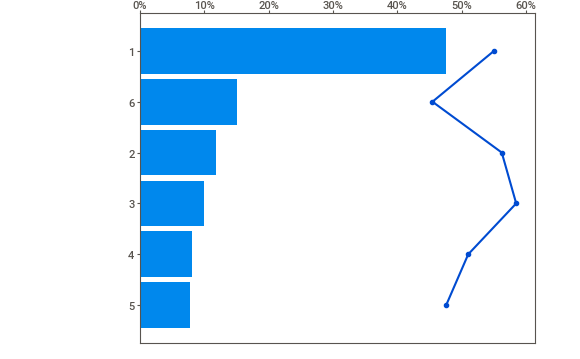
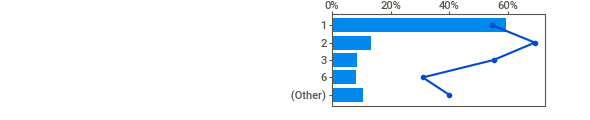
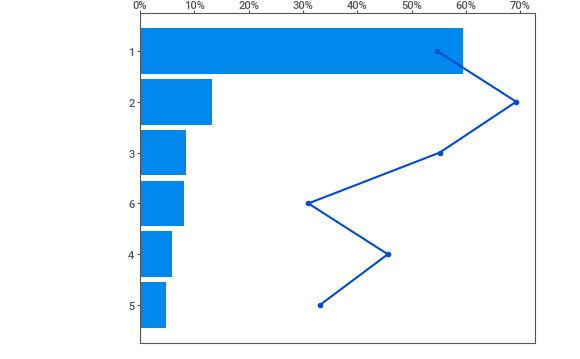
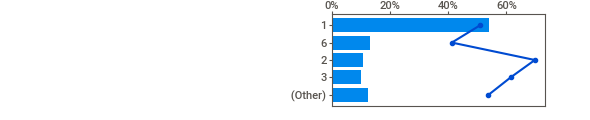
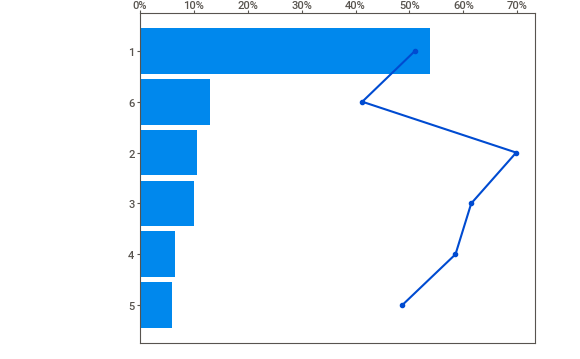
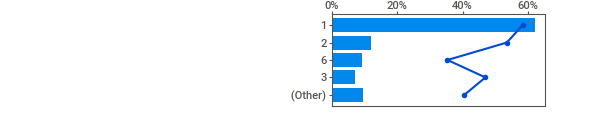
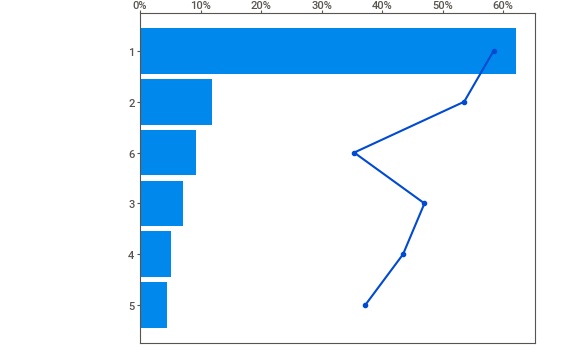
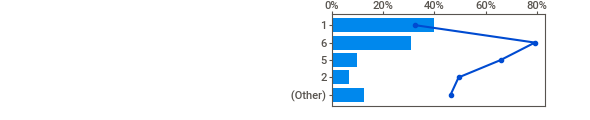
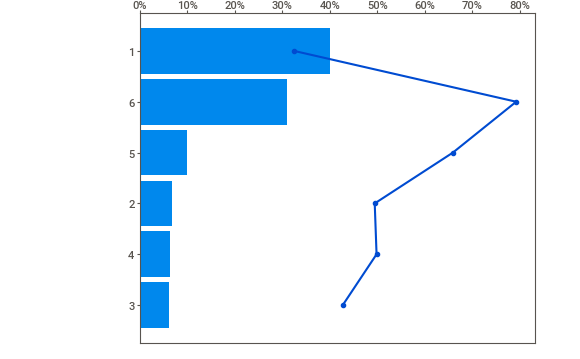
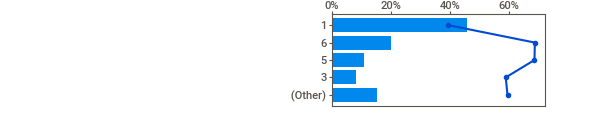
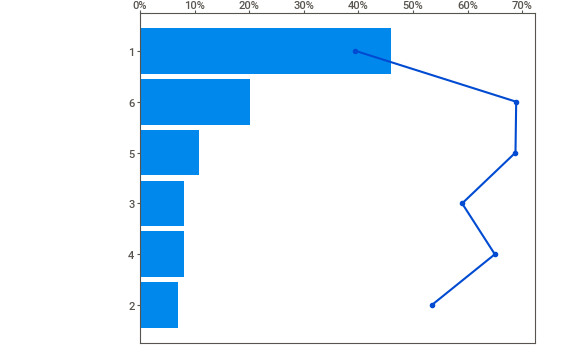
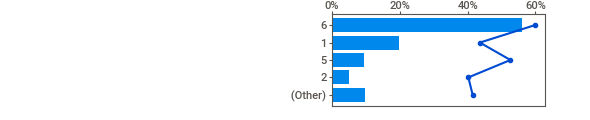
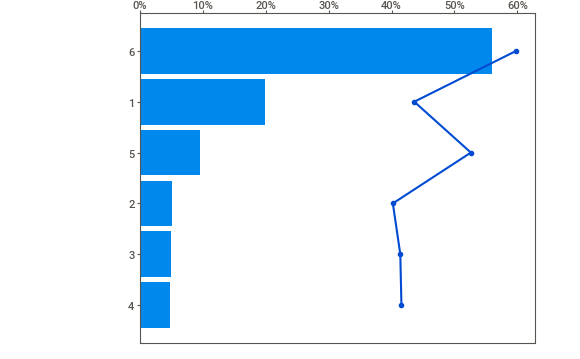
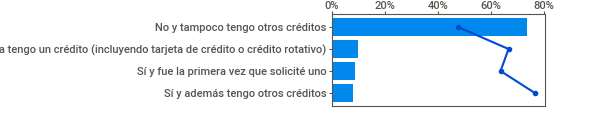
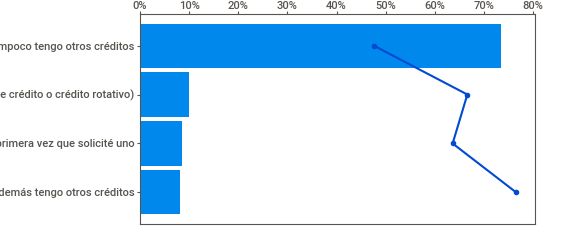
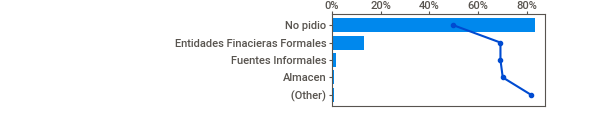
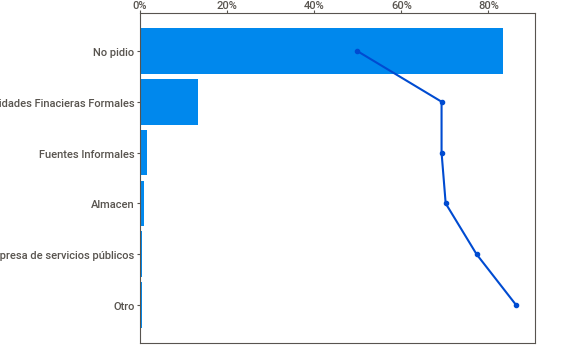
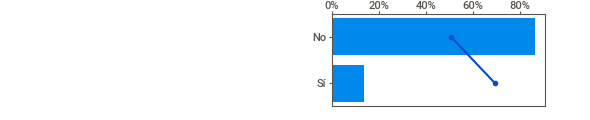
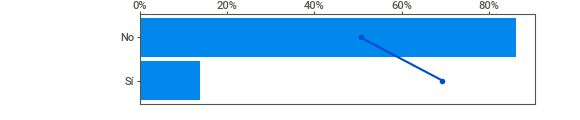
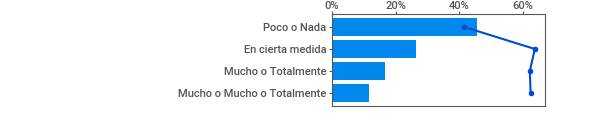
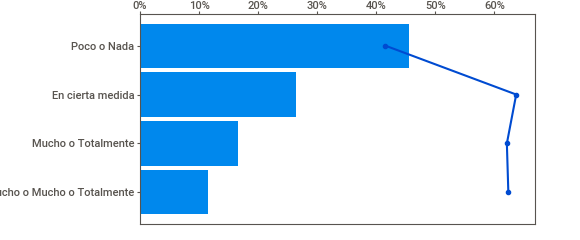
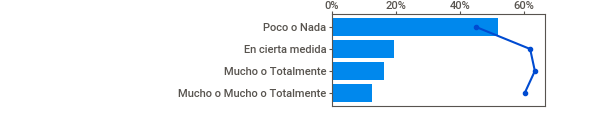
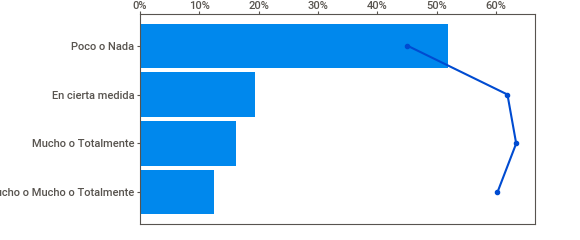
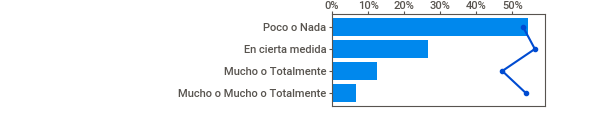
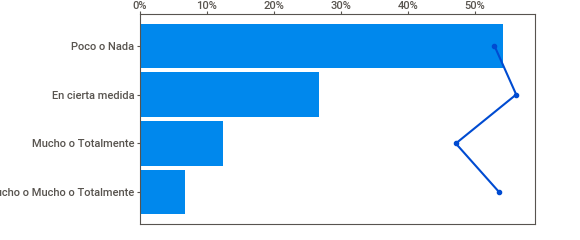
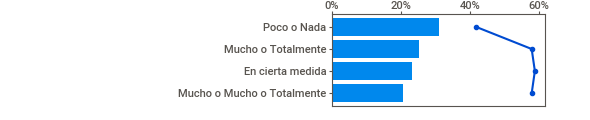
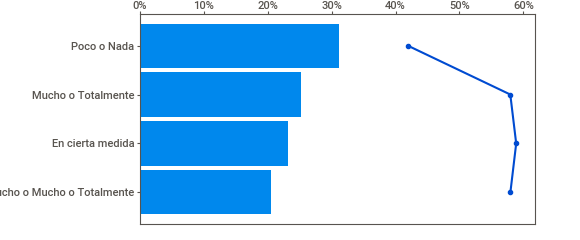
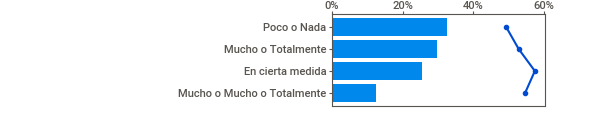
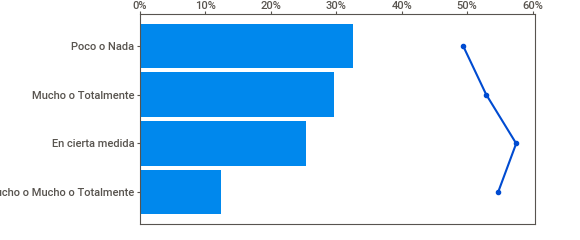
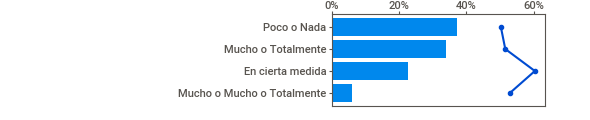
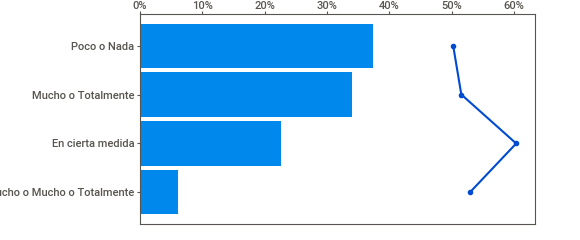
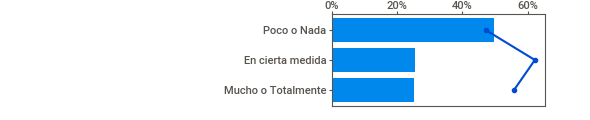
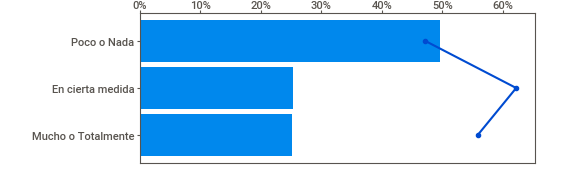
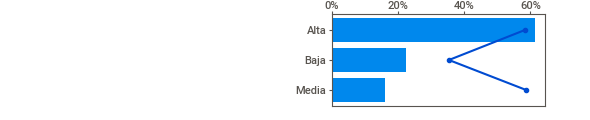
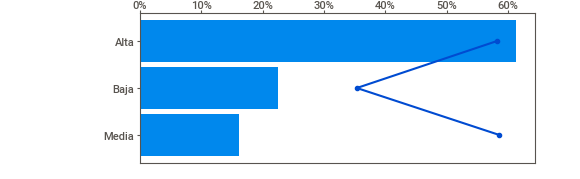
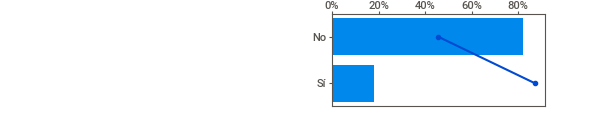
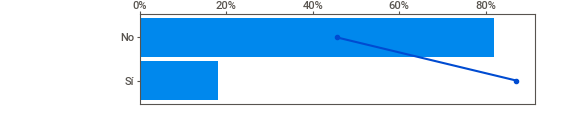
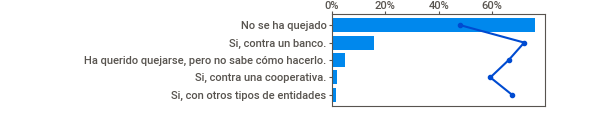
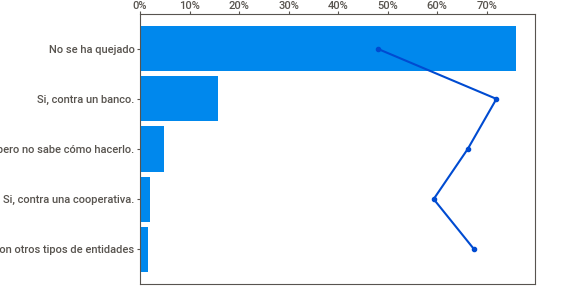
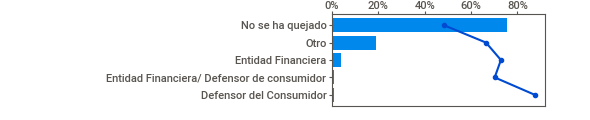
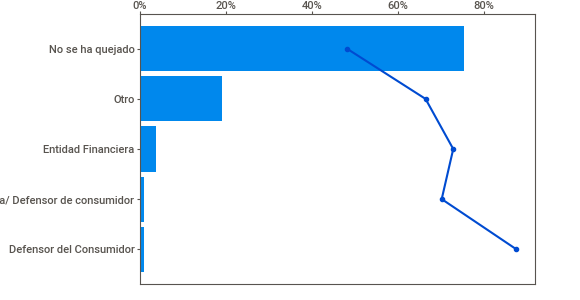
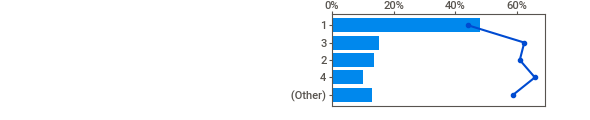
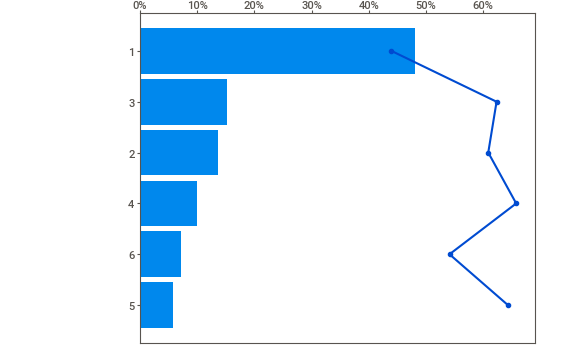
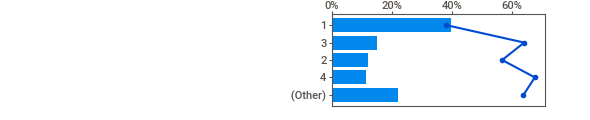
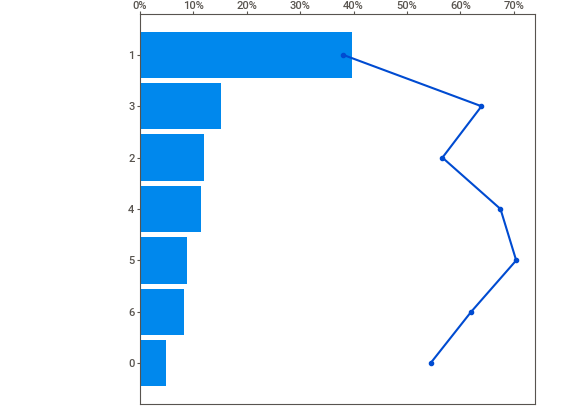
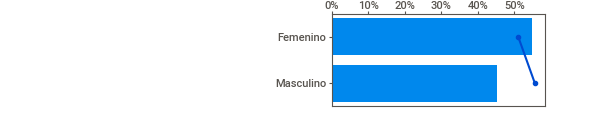
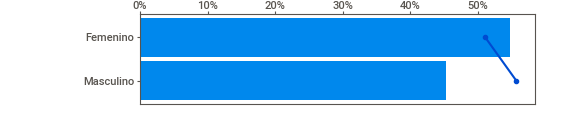
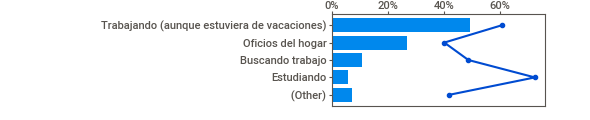
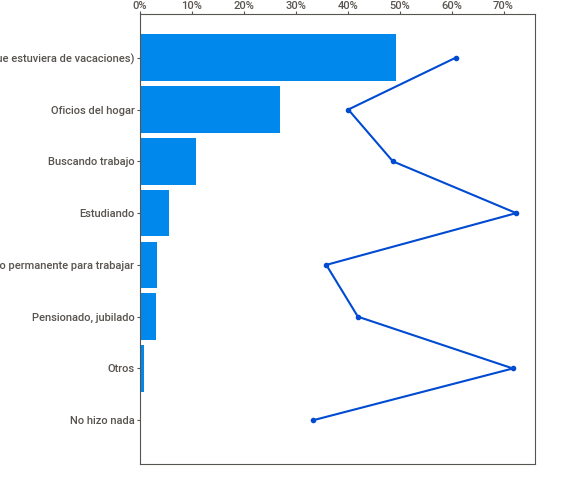
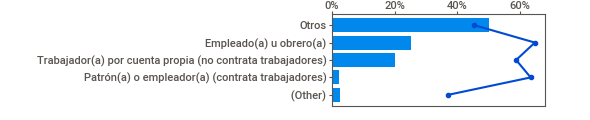
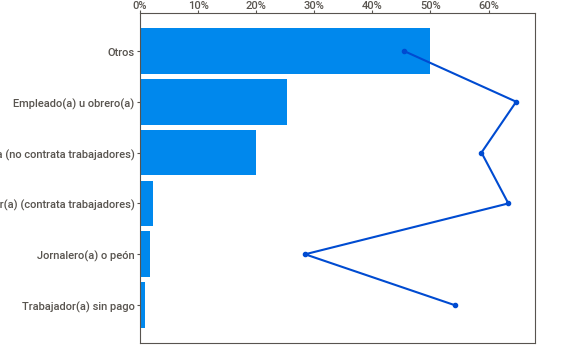
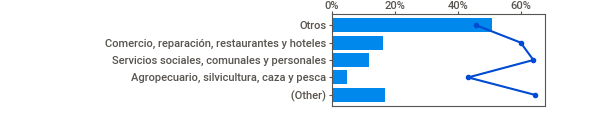
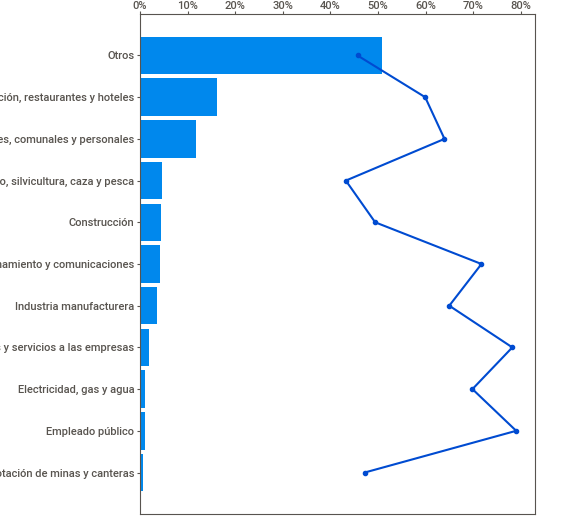
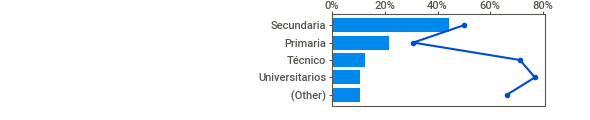
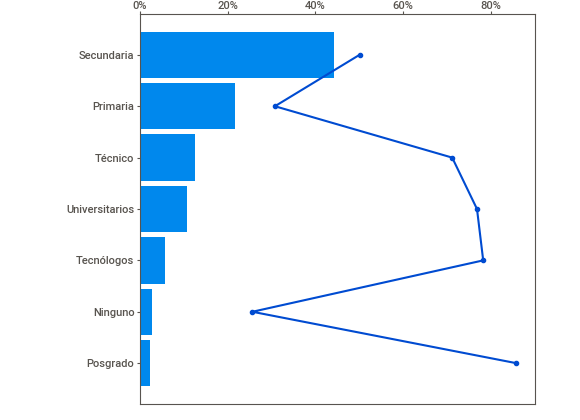
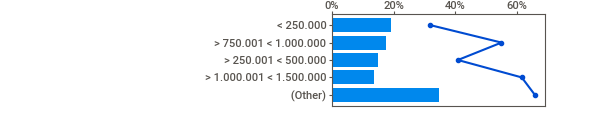
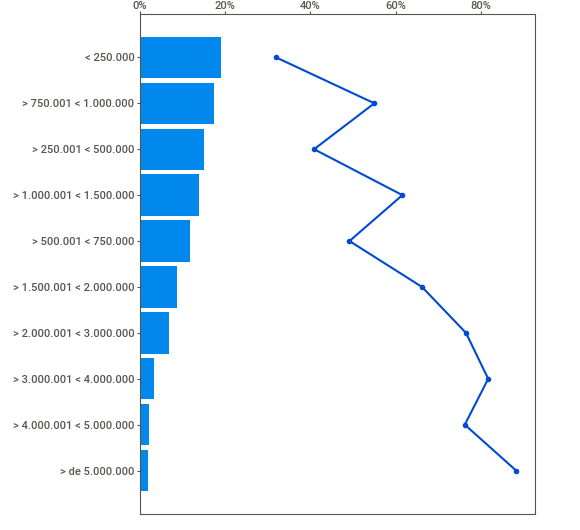
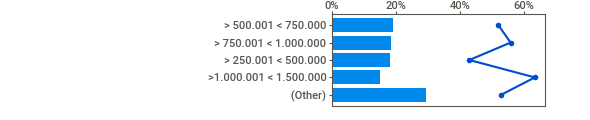
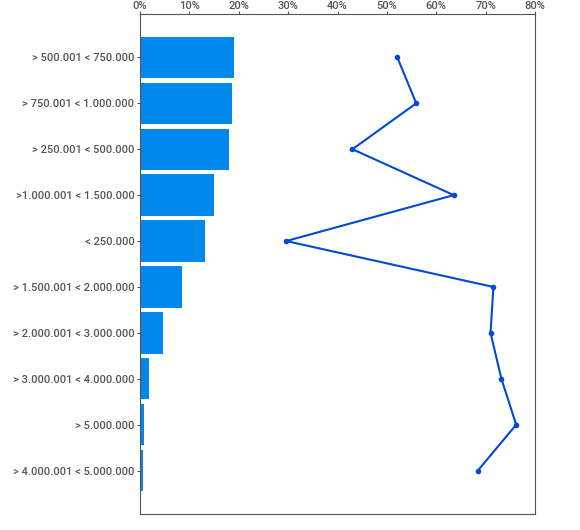
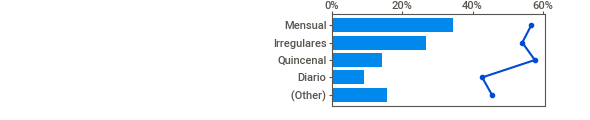
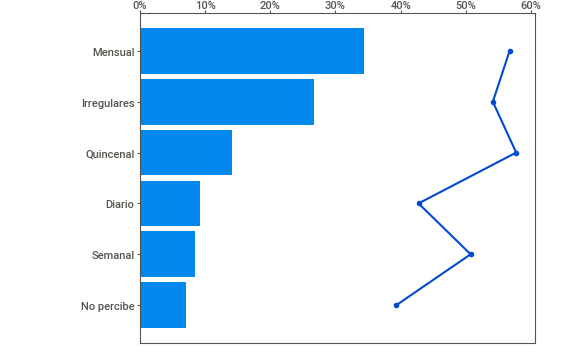
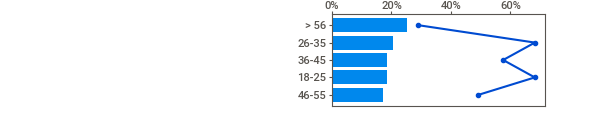
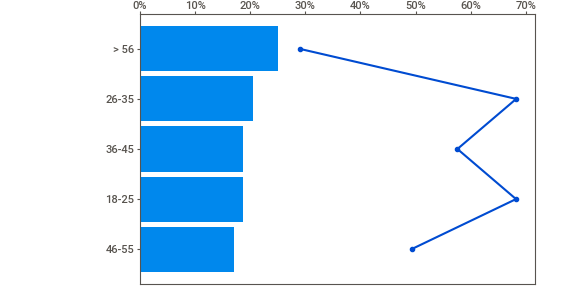
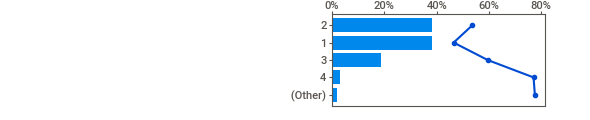
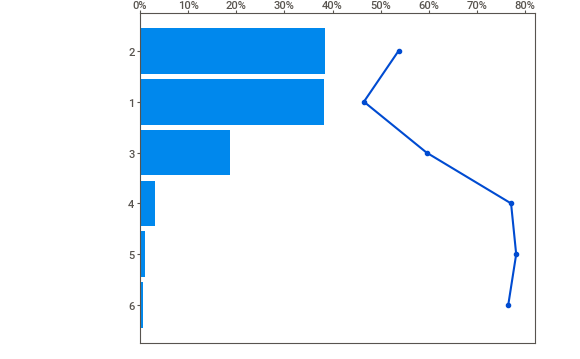
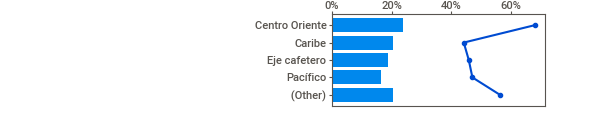
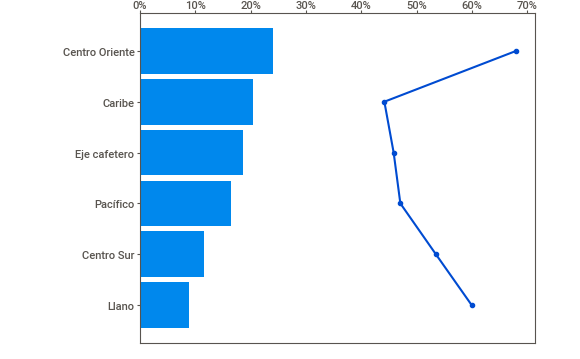
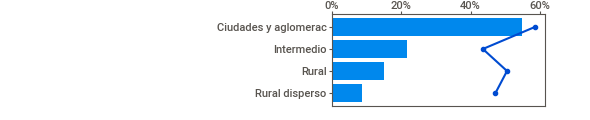
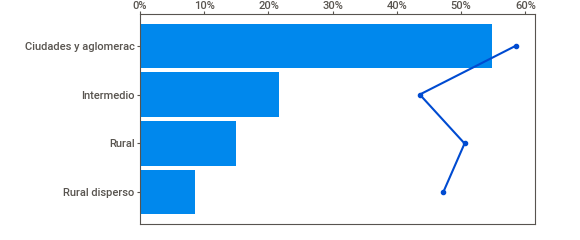
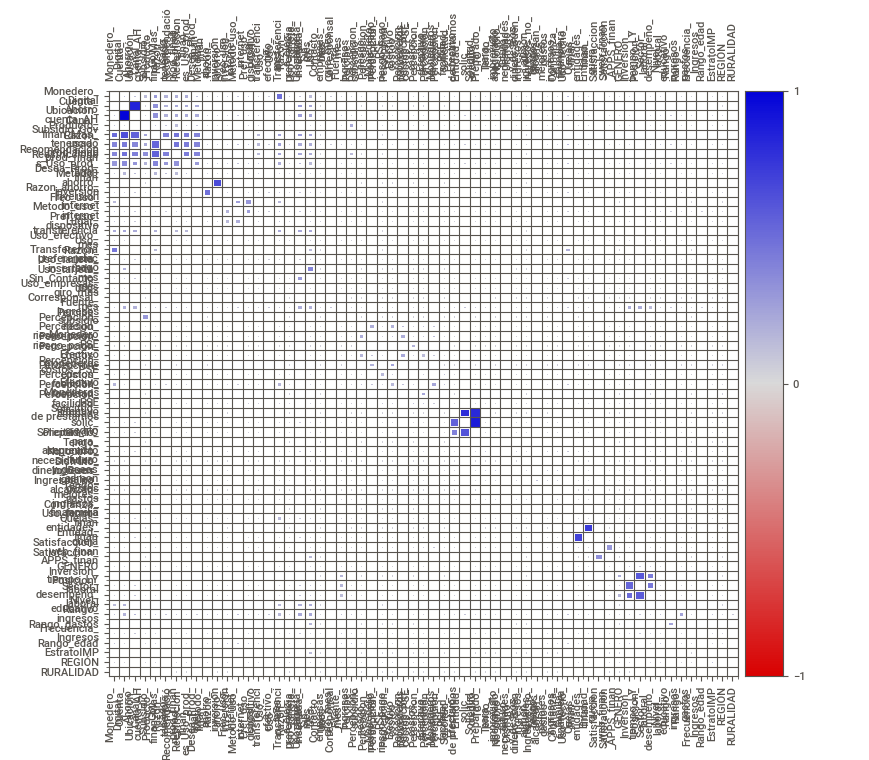
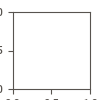

In [ ]:
HTML("SWEETVIZ_REPORT.html")

Eliminamos las variables que presentan una fuerte asociación con la variable objetivo

Dividir la base test y la base train